## <span style="font-family: Algerian; font-weight:bold;font-size:1.5em;color:Red; center">      Project on Featurization and Model Tuning:

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.5em;color:violet;">Contents:

[Data Description](#Ds)

[Attribute Information](#AI)

[Objective](#O)

[Steps, Tasks and Solution](#sts)



<a id='the_destination'></a>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1em;color:Orange;"> Data Description
<a id='Ds'></a>
    <font color=darkblue>
        

-	Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
        
        
- The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
        

        
 </font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;">Attribute Information
<a id='AI'></a>
    <font color=darkblue> 
        
        
-	All the features except age are ingredients used for making concrete and decides the strength. 
-	All are numeric in nature. 

        
     Cement : measured in kg in a m3 mixture
        
        
 Blast : measured in kg in a m3 mixture
        
        
 Fly ash : measured in kg in a m3 mixture
        
        
 Water : measured in kg in a m3 mixture
        
        
 Superplasticizer : measured in kg in a m3 mixture
        
        
 Coarse Aggregate : measured in kg in a m3 mixture
        
        
 Fine Aggregate : measured in kg in a m3 mixture
        
        
 Age : day (1~365)
        
        
 Concrete compressive strength measured in MPa
        
        
</font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;"> Objective
<a id='O'></a>
    <font color=darkblue>  The aim of the dataset is to predict the concrete compressive strength of high performance concrete (HPC). HPC always does not mean high strength but covers all kinds of concrete for special application that are not possible with standard concretes. Therefore, our target value is 'Concrete Compressive Strength [MPa] or strength column in MPa'.
        
</font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;"> Steps, Tasks and Solutions
<a id='sts'></a>
    <font color=red>
1. [Import the necessary libraries](#I)
        
2. [Read the data as a data frame and Preprocessing of the data](#R)
        
3. [Perform basic EDA](#EDA)
        
    * a. [Description of the dataset (general operations and statistical description)](#3a)
        
    * b. [Univariate & Bivariate Analysis](#3b) 
        
    * c. [Multivariate analysis](#3c) 
        
    * d. [Observations](#3d)
              
        
4. [Splitting of Dataset into training and testing & Scaling](#STT)
   
    
5. [Iteration -1: With various Linear Models](#I1)
        
    * a. [Train and test using various Linear Algorithms](#I1a) 
              
    * b. [Model building using KFold CV](#I1b) 
              
    * c. [Observations on Model Score](#I1c) 
        
           
6. [Iteration -2: Addressing Mix of Gaussian, Generation of Clusters, Addressing Outliers, Modeling Building ](#I2)
        
    * a. [Determining Mix of Gaussian](#I2a) 
        
    * b. [Generation of Clusters by Using K-Means Culstering](#I2b) 
        
    * c. [Addressing Outliers](#I2c) 
        
    * d. [Various Linear model building and testing with Train_Test_Split method](#I2d)
        
    * e. [Various Linear model building and testing with KFold CV](#I2e)  
         
    * f. [Observations on Model Score ](#I2f)
  
   
        
7. [Iteration -3: Composite Feature Creation, Generation of Cluster, Outlier Detection & Treatment, Model Building & Testing](#I3)
        
    * a. [Composite Feature Creation](#I3a) 
        
    * b. [Generation of Cluster and cluster error](#I3b) 
        
    * c. [Detection of Outliers and Treatment](#I3c)  
        
    * d. [Modeling Building & Testing using Train_Test_Split method](#I3d)  
        
    * e. [Modeling Building & Testing using KFold CV](#I3e) 
         
    * f. [Observations on Model Score ](#I3f) 
                   

8. [Iteration -4: Model Tuning using GridSearch CV and RandomSearch CV](#I4)
        
    * a. [Best Model suitbale for this Project](#I4a) 
        
    * b. [Model Tuning using Grid Search CV](#I4b)
        
    * c. [Model Tuning using Randomized Search CV](#I4c) 
         
    * d. [Model Performance Range at 95% Confidence Interval](#I4d) 
         
            
        
9. [Conclusion](#C)
     
</font>
    <a id='the_destination'></a>

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 1. Import the necessary libraries
<a id='I'></a>

In [796]:
# importing the necessary package for performing advanced mathematical operation
import math

# importing the necessary package for managing data
import pandas as pd
import numpy as np

# importing the necessary packages for visualisation
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


sns.set (color_codes = True)
%matplotlib inline 

# commmand to tell Python to display my graphs in a darkgrid format
sns.set_style(style= 'darkgrid')


# for doing statistical calculation
import scipy
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import skew


# pre-processing method
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

# For creating Polynomial Features
from sklearn.preprocessing import PolynomialFeatures


# methods and classes for evaluation
from scipy.stats import randint as sp_randint
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.utils import resample


import warnings
warnings.filterwarnings("ignore")

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 2. Read the data as a data frame
<a id='R'></a>

In [797]:
df = pd.read_csv('concrete (1).csv')

In [798]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 3. Performing basic Exploratory Data Analysis (EDA) 
<a id='EDA'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.a. Description of the dataset (general operations and statistical description)
<a id='3a'></a>

In [799]:
def indetailtable(df):
    print(f'Dataset Shape: {df.shape}')
    print('Total Number of rows in dataset= {}'.format(df.shape[0]))
    print('Total Number of columns in dataset= {}'.format(df.shape[1]))
    print('Various datatypes present in the dataset are: {}\n'.format(df.dtypes.value_counts()))
    
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()
    summary['1st value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['1028th Value'] = df.loc[1028].values
    summary['1029th Value'] = df.loc[1029].values
    
    return summary

In [800]:
brief = indetailtable(df)
brief

Dataset Shape: (1030, 9)
Total Number of rows in dataset= 1030
Total Number of columns in dataset= 9
Various datatypes present in the dataset are: float64    8
int64      1
dtype: int64



index   dtypes          Name  Misssing_values  Unique_values  \
0        cement  float64        cement                0            278   
1          slag  float64          slag                0            185   
2           ash  float64           ash                0            156   
3         water  float64         water                0            195   
4  superplastic  float64  superplastic                0            111   
5     coarseagg  float64     coarseagg                0            284   
6       fineagg  float64       fineagg                0            302   
7           age    int64           age                0             14   
8      strength  float64      strength                0            845   

   Duplicate_values  1st value  2nd Value  1028th Value  1029th Value  
0                25     141.30     168.90        342.00        540.00  
1                25     212.00      42.20         38.00          0.00  
2                25       0.00     124.30          0.00          0.00  
3                25     203.50     158.30        228.00        173.00  
4                25       0.00      10.80          0.00          0.00  
5                25     971.80    1080.80        932.00       1125.00  
6                25     748.50     796.20        670.00        613.00  
7                25      28.00      14.00        270.00          7.00  
8                25      29.89      23.51         55.06         52.61

### *Comments:*


<font color = blue>
    
- There are basically 1030 number of data points / observations and 08 number of columns/features available in the dataset.
    
- All the columns are numeric in nature, they are either float or integer type. Here the the column 'strength' is the target column which predicts the concrete compressive strength of high performance concrete (HPC).

- HPC does not mean high strength but covers all kinds of concrete for special applications that are not possible with standard concerts. 
    
- The rest of the columns are independent columns, and all are numeric in nature.
    
- Here, we don't have missing values but certainly we have some duplicate columns. 
    
- A lot of unique values can be observed from each of the columns.
    
- Further, we will explore more for duplicate columns and impute the proper treatment for avoiding any biasness by our models. 
    
- Since, the target column is a continuous column, we can expect the models to be linear models rather than classification models.


In [801]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [802]:
for value in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']:
    print(value,':', sum(df[value] == '?'))

cement : 0
slag : 0
ash : 0
water : 0
superplastic : 0
coarseagg : 0
fineagg : 0
age : 0
strength : 0


In [803]:
df.isnull().values.any()

False

<font color = blue>
    
- Neither any 'Null values' nor we have any '?' symbols present in the data set, so we can consider the data set as a cleaned one and eligible for further analysis.

In [804]:
duplicate_rows_df = df[df.duplicated()]

print('Number of duplicated rows:', duplicate_rows_df.shape )

Number of duplicated rows: (25, 9)


<font color = blue>

> Hence, there are 25 rows with duplicate elements present in each column, which can be seen as repeated in nature and can be treated as irrelevant. This problem could be due to things like data entry errors or data collection methods. Whatever the reason may be, duplication may lead to make incorrect conclusions by leading you to believe that some observations are more common than they really are.

In [805]:
duplicate_rows_df_cement = df[df.duplicated(['cement'])]
print(duplicate_rows_df_cement.shape)

(752, 9)


- So there are cases where cement value is same, we can also check the unique values in the column

In [806]:
print(len(df.cement.unique()))

278


<font color = blue>

> Hence it has total 278 unique values, by adding the unique and duplicated values for the column cement (278+752 = 1030) we have 1030 total number of rows. So it is necessary to retain the unique rows for better analysis, so at least we can drop the rows with same values in all column.

In [807]:
print('Shape of dataframe after dropping duplicates', df.drop_duplicates().shape)

Shape of dataframe after dropping duplicates (1005, 9)


> Thus we have deleted total 25 number of duplicated rows.
Now the data frame seems to be legit for further EDA.


In [808]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

### *Comments:*


<font color = blue>

In the above table 5 point summary have been described, i.e., minimum value, 25%, 50%, 75%, and maximum values of each column. 
    
- The statistical table above shows the distribution of each attribute by signifying the unique values of each column. 
    
- Some of the columns have zero values in it. It means these attribute constituent are not present in the manufacturing of the concrete. This might have happened intentionally to test the strength of the concrete by excluding the constituents.
    
- The age column has a minimum value of 1 in it. This value signifies the bare minimum incubation period allowed for the concrete to create the atomic bonding between each constituent. Normally 28 days is the recommendation time to ensure the correct results. However this 1 day period or days below 28 gives less strength to the concrete.
    
- Similarly, the distribution of strength column shows the minimum value of 2.33 MPa, means a week concrete with less compressive strength, this might have happened due to improper mixture ratio of constituents, or extremely more or extremely less quantity of water or may be due to very less incubation period of concrete.
    
- Though, the columns have a single unit i.e. kg/m^3, except age and strength, they have a huge range of values or scale of values, which may bias the model performance.
    
- So to avoid this kind of problem a proper scaling is required may be by MinMaxScalar or StandardScaler or simply by imputing the zscore.
    
    
- Let's explore more about all the attributes individually....


In [809]:
# Cheking IQR
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64

- The IQR of all the attributes are calculated, and we can see the cement has highest Inter Quartile Range and strength has lowest Inter Quartile Range.

In [810]:
# Checking range
print( 'Range in Cement:', df.cement.max() - df.cement.min())
print('Range in Slag:',df.slag.max() - df.slag.min())
print('Range in Ash:',df.ash.max() - df.ash.min())
print('Range in water:',df.water.max() - df.water.min())
print('Range in Superplastic:',df.superplastic.max() - df.superplastic.min())
print('Range in Coarseagg:',df.coarseagg.max() - df.coarseagg.min())
print('Range in fineagg:',df.fineagg.max() - df.fineagg.min())
print('Range in Age:',df.age.max() - df.age.min())
print('Range in Strength:',df.strength.max() - df.strength.min())

Range in Cement: 438.0
Range in Slag: 359.4
Range in Ash: 200.1
Range in water: 125.2
Range in Superplastic: 32.2
Range in Coarseagg: 344.0
Range in fineagg: 398.6
Range in Age: 364
Range in Strength: 80.27


- Here the range (the difference between maximum and minimum values) has been calculated for each attributes.

In [811]:
# Checking for the 1.5*IQR for presence of outliers
1.5*IQR

cement          236.4375
slag            214.4250
ash             177.4500
water            40.6500
superplastic     15.3000
coarseagg       146.1000
fineagg         139.5750
age              73.5000
strength         33.6375
dtype: float64

- To calculate the spread of outliers we will be taking the 1.5 times Inter Quartile Range value.

In [812]:
 (df.max()-df.min()) - 1.5*IQR 

cement          201.5625
slag            144.9750
ash              22.6500
water            84.5500
superplastic     16.9000
coarseagg       197.9000
fineagg         259.0250
age             290.5000
strength         46.6325
dtype: float64

- Thus by subtracting the 1.5*IQR from range we can get the spread of the outliers beyond the quartile range or whisker.

- The above difference shows us the clear-cut presence of outliers beyond upper quartile range.  


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.b. Univariate & Bivariate Analysis
<a id='3b'></a>

In [813]:
# Checking the total number of unique values for target column
pd.value_counts(df['strength'])

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
61.23    1
26.31    1
38.63    1
47.74    1
15.75    1
Name: strength, Length: 845, dtype: int64

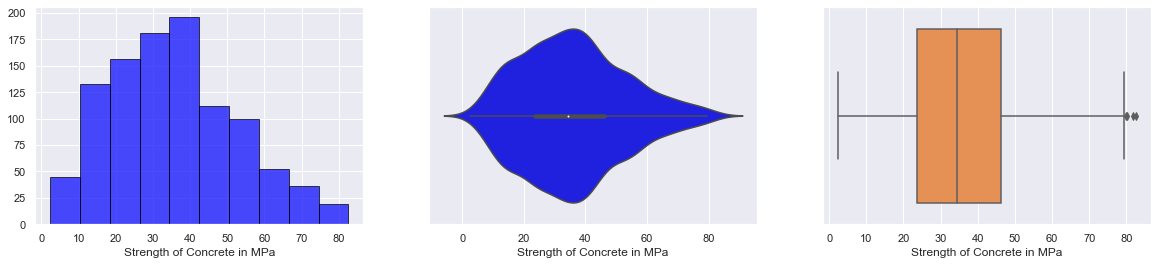

In [814]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)

plt.hist(df.strength , color = 'blue', edgecolor = 'black',  alpha = 0.7);
plt.xlabel('Strength of Concrete in MPa');

plt.subplot(1,3,2)
sns.violinplot(df['strength'], color = 'blue')
plt.xlabel('Strength of Concrete in MPa');

plt.subplot(1,3,3)
sns.boxplot(x = df.strength,palette = 'YlOrRd')
plt.xlabel('Strength of Concrete in MPa');


### Observations:

<font color = blue>

- The Strength column here is the target column, which is to be predicted for a concrete based upon the content of constituents in it. The strength here signifies the Compressive strength of an object. This compressive strength is measured in a Universal Testing machine by applying a uniform compressive force to the specimen and it is measured as Mega Pascal (MPa) generally in SI unit.
    

- Compressive strength is the capacity of a material/structure to withstand loads tending to reduce size as opposed to tensile strength, which withstands loads tending to elongate.
    

- This compressive strength of concrete determines the quality of concrete or gives us the grade of the concrete manufactured by using different ingredients within a given incubation period. This quality is highly influenced by the constituents used for producing it. These constituents are given as independent attributes in this dataset.

    
- The strength is also dependent upon the number days we allow it to solidify in turn we allow it to create intermolecular bonds between each of the constituents. This period is known as incubation period and generally measures in terms of days.

    
- A mould is prepared to bring the desired shape of the concrete, and the semi solid mixture is allowed to pour into the mould to attain the shape and generally based upon the requirement of strength, the incubation period is decided and then it is allowed to solidify.

    
- An approximate normal distribution of the target column can be observed, however the long tail towards right in Violin plot shows the presence of outliers. 

    
- This leverage of outliers can be observed in Box-whisker plot, and the outliers are situated near by to the upper quartile range or maximum values.


- Thus a proper treatment is necessary to avoid any kind of biasness during model building and predicting model performance.


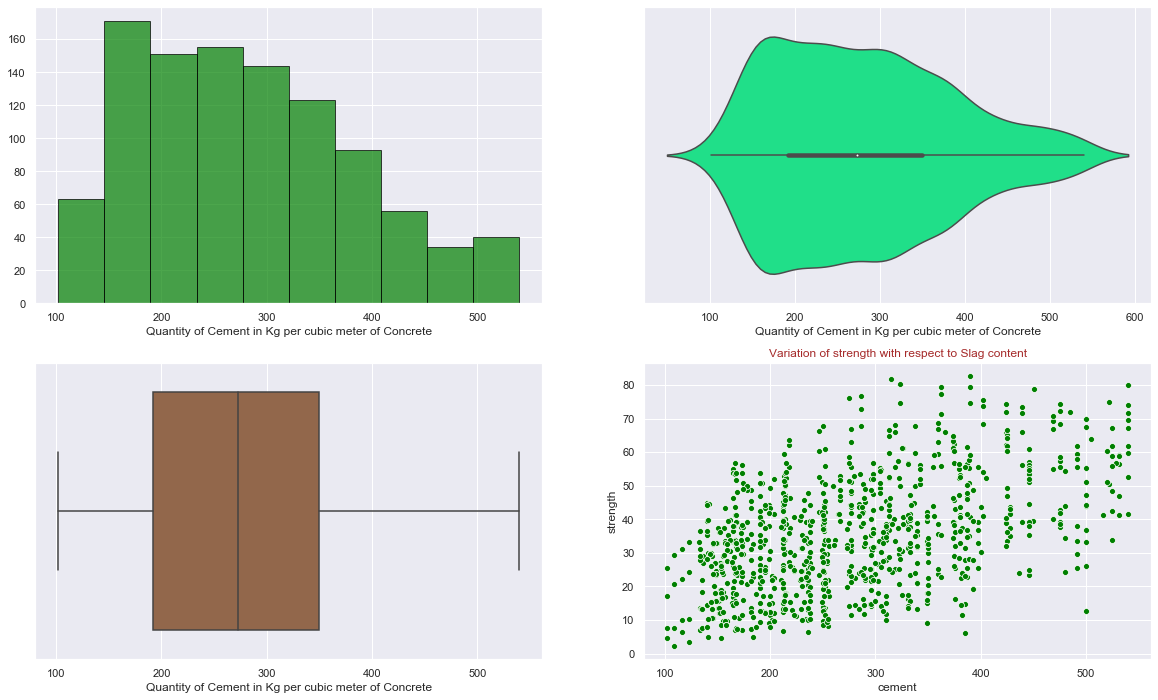

In [815]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.cement , color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of Cement in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['cement'], palette = 'gist_rainbow')
plt.xlabel('Quantity of Cement in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.cement, palette = 'copper')
plt.xlabel('Quantity of Cement in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.cement, df.strength, color = 'green')
plt.title('Variation of strength with respect to Slag content', color = 'brown');

### Observations:

<font color = blue>
    
    
- Cement is one of the independent attribute, which plays a major role in building compressive strength of the concrete. By adding more cement, strength of the concrete increases.

- However, if excessive amount of cement is added to the concrete then high heat of hydration will be generated, which in turn induces the thermal stresses in concrete by creating cracks. 

- The distribution of the data for this column is not normal. The column seems to be right skewed and we don't have outliers present in it.


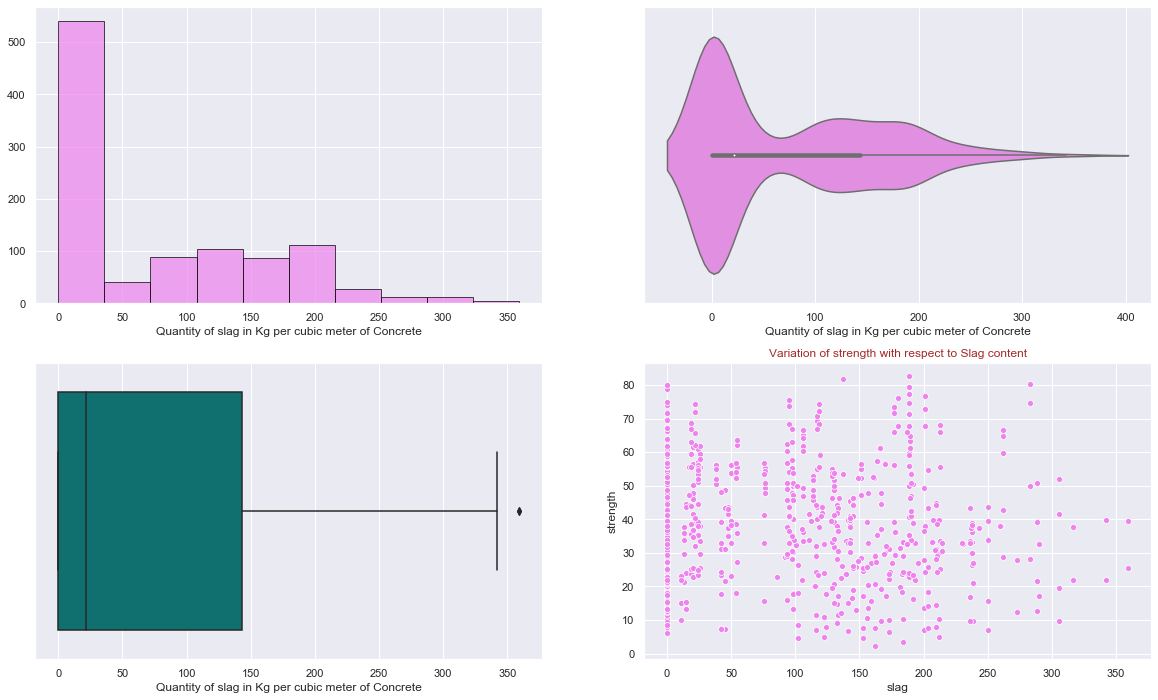

In [816]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.slag , color = 'violet', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of slag in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['slag'], color = 'violet')
plt.xlabel('Quantity of slag in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.slag, color = 'teal')
plt.xlabel('Quantity of slag in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.slag, df.strength,color = 'violet' )
plt.title('Variation of strength with respect to Slag content', color = 'brown');

### Observations:

<font color = blue>
    
- Slag is a by-product generated out from blast furnace. This constituent plays a major role in deciding the strength of concrete. 

- It acts like a binder and helps to increase the durability and strength of the concrete. However, the hardening process takes longer time to reach full compressive strength. 

- Initially the distribution seems to be normally distributed, however as the data point increases it becomes right skewed with a long tail representing the presence of outliers.

- Multi modal distribution signifies the two clusters due to mix of Gaussians. This might have happened during data collection.

- Box-whisker plot shows the presence of outliers beyond upper quartile range.


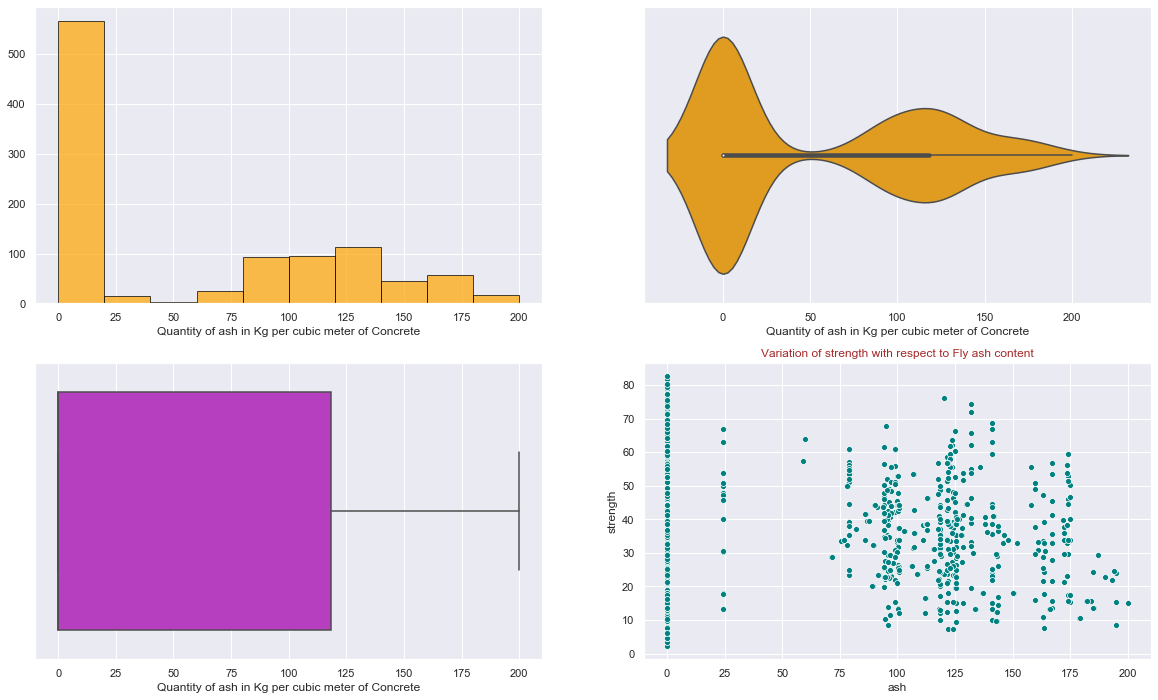

In [817]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.ash , color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of ash in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['ash'], color = 'orange')
plt.xlabel('Quantity of ash in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.ash, palette = 'gnuplot2')
plt.xlabel('Quantity of ash in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.ash, df.strength, color = 'teal' );
plt.title('Variation of strength with respect to Fly ash content', color = 'brown');

### Observations:

<font color = blue>

- Fly ash is produced in small dark flakes by the burning of powdered coal. 

- It acts like a good binder like slag to improve the durability and strength of the concrete. However, the hardening process takes longer time to reach full compressive strength.

- By addition of fly ash reduces the concrete bleeding and improves its workability. Fly ash can improve the long-term compressive strength of the conventional concrete.

- The distribution of the column seems to be a complete mix of Gaussians. A gap or discontinuity between two Gaussian indicates the presence of two clusters in the column.

- Though the distribution seems to be right tailed, the absence of outliers can be observed in this.


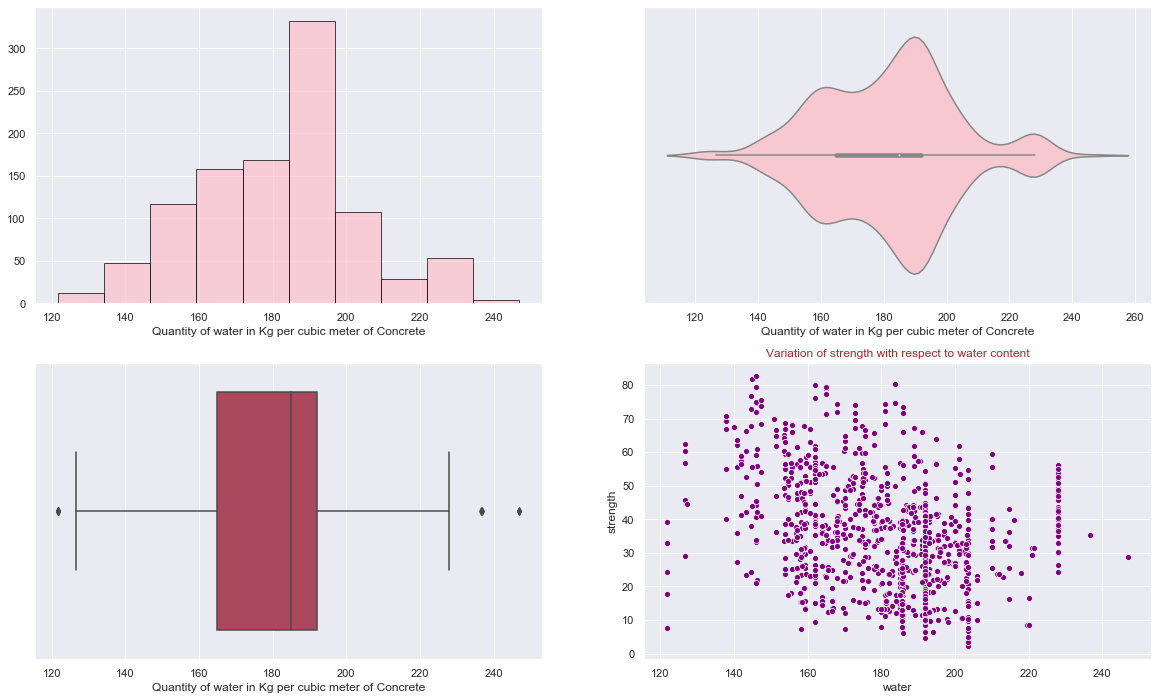

In [818]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.water , color = 'pink', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of water in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['water'], color = 'pink')
plt.xlabel('Quantity of water in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.water, palette = 'inferno')
plt.xlabel('Quantity of water in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.water, df.strength,color = 'purple' );
plt.title('Variation of strength with respect to water content', color = 'brown');

### Observations:

<font color = blue>

-  Water plays a role of binder between all the constituents to create a concrete. 

- An incorrect proportion of water in concrete may lead to less strength or cracks.

-  Too much of water or over-watered concrete may lead to lower strength, reduced durability, shrinkage cracking and a variety of surface problems. Thus, proper amount of water to be added to concrete with all other constituents to ensure the desired strength.

- The Distribution of the column seems to be multimodal in nature with more than three clusters.

- The long extended tails in the distribution to both the sides indicates the leverage of outliers in the attribute.

- From the Box-Whiskers plot we can observe the presence of outliers on both the sides.


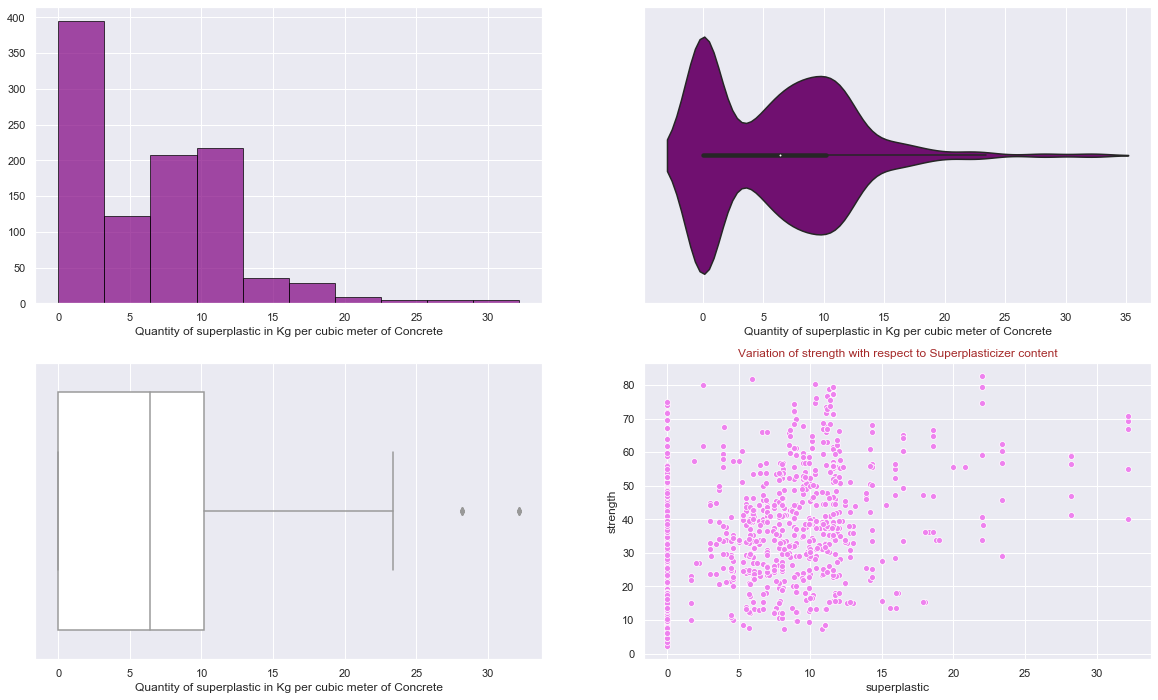

In [819]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.superplastic , color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of superplastic in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['superplastic'], color = 'purple')
plt.xlabel('Quantity of superplastic in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.superplastic, color = 'white')
plt.xlabel('Quantity of superplastic in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.superplastic, df.strength,color = 'violet');
plt.title('Variation of strength with respect to Superplasticizer content', color = 'brown');

### Observations:

<font color = blue>

- The Superplasticizer is used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.

- In the case of hardened concrete the use of Superplasticizer will increase compressive strength by enhancing the effectiveness of compaction to produce denser concrete. 

- The distribution of the column clearly indicates the mix of Gaussian. The distribution curve seems to be bimodal in nature with uneven distribution. 

- The right skewed data with right long tail in violin plot shows indicates the presence of outliers in right side.

- The box-whisker plot shows the presence of outliers in right side at a very high distance from upper quartile.


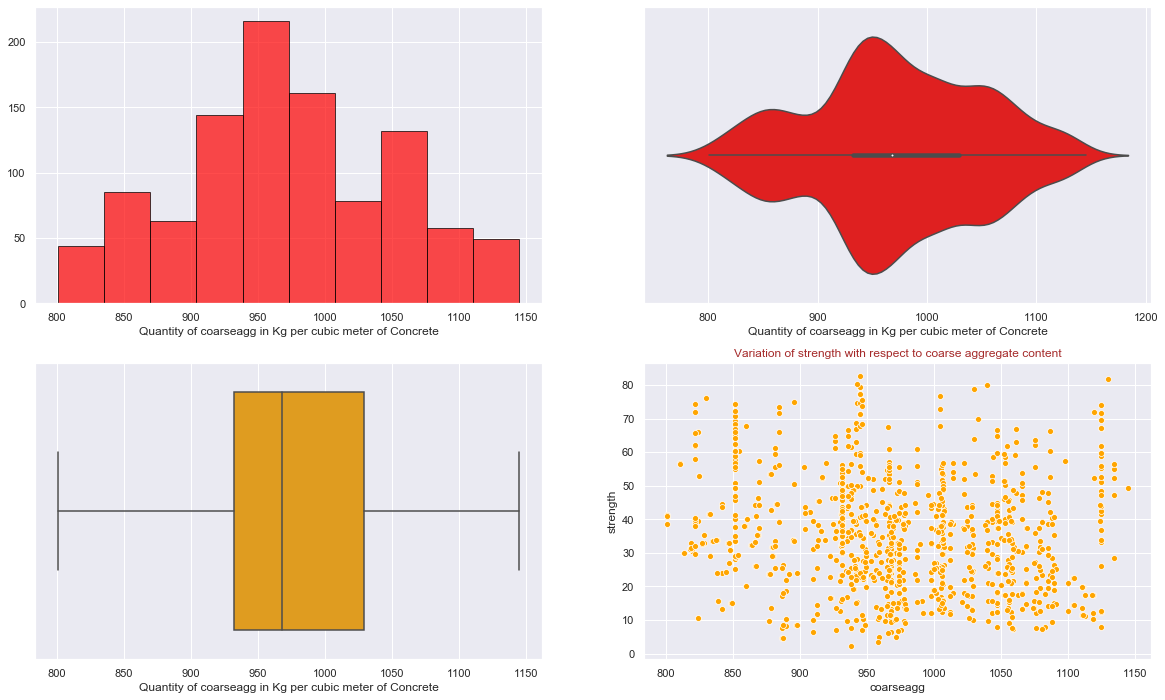

In [820]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.coarseagg , color = 'red', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Quantity of coarseagg in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['coarseagg'], color = 'red')
plt.xlabel('Quantity of coarseagg in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.coarseagg, color = 'orange')
plt.xlabel('Quantity of coarseagg in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.coarseagg, df.strength, color = 'orange');
plt.title('Variation of strength with respect to coarse aggregate content', color = 'brown');

### Observations:

<font color = blue>

- Coarseagg stands for Coarse Aggregate column. It generally consists of sand, Grave and crushed stone.

- The larger percentage of coarse aggregate in concrete mix makes it to contribute a lot to the strength of concrete. However, the tensile strength of the concrete gets severely affected by increasing the size of coarse aggregate.

- In this column, the distribution seems to be multimodal and it can be due to mix of Gaussian once again and may be due to uneven distribution of data points.

- This column doesn't have any outliers so it is free from baseness arises out of outliers.


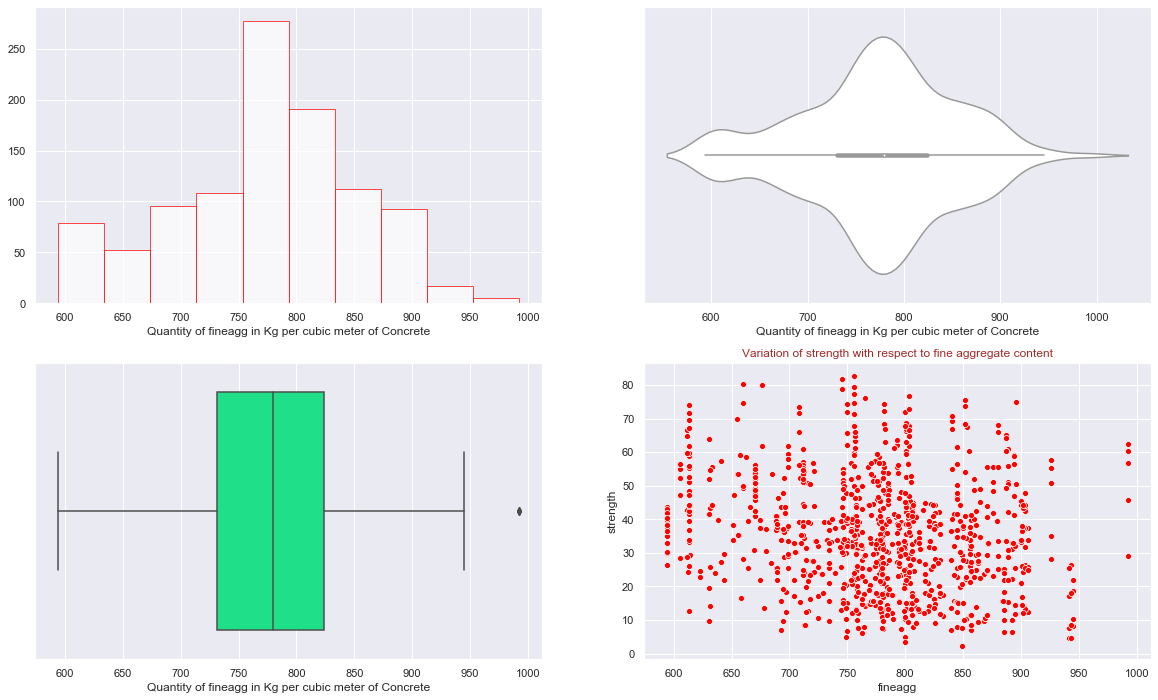

In [821]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.fineagg , color = 'white', edgecolor = 'red', alpha = 0.7);
plt.xlabel('Quantity of fineagg in Kg per cubic meter of Concrete')

plt.subplot(2,2,2)
sns.violinplot(df['fineagg'], color = 'white',edgecolor = 'red')
plt.xlabel('Quantity of fineagg in Kg per cubic meter of Concrete')

plt.subplot(2,2,3)
sns.boxplot(x = df.fineagg, palette = 'gist_rainbow')
plt.xlabel('Quantity of fineagg in Kg per cubic meter of Concrete');

plt.subplot(2,2,4)
sns.scatterplot(df.fineagg, df.strength, color = 'red');
plt.title('Variation of strength with respect to fine aggregate content', color = 'brown');

### Observations:

<font color = blue>

- fineagg stands for Fine Aggregate, it consist of small size of coarse aggregate with fine crushed stones. It mostly contains the sand. 

- This increases the flexural strength of the concrete. However the workability of concrete decreases as fine content increases. 

- It helps in binding cement properly and thus increases the strength of the concrete. Beyond certain level of addition, it decreases the strength of the concrete.

- The distribution of the column is nearly normal distribution. However, the right tailed data points indicate the presence of outliers. 

- The same can also be inferred from the Box-Whisker plot.


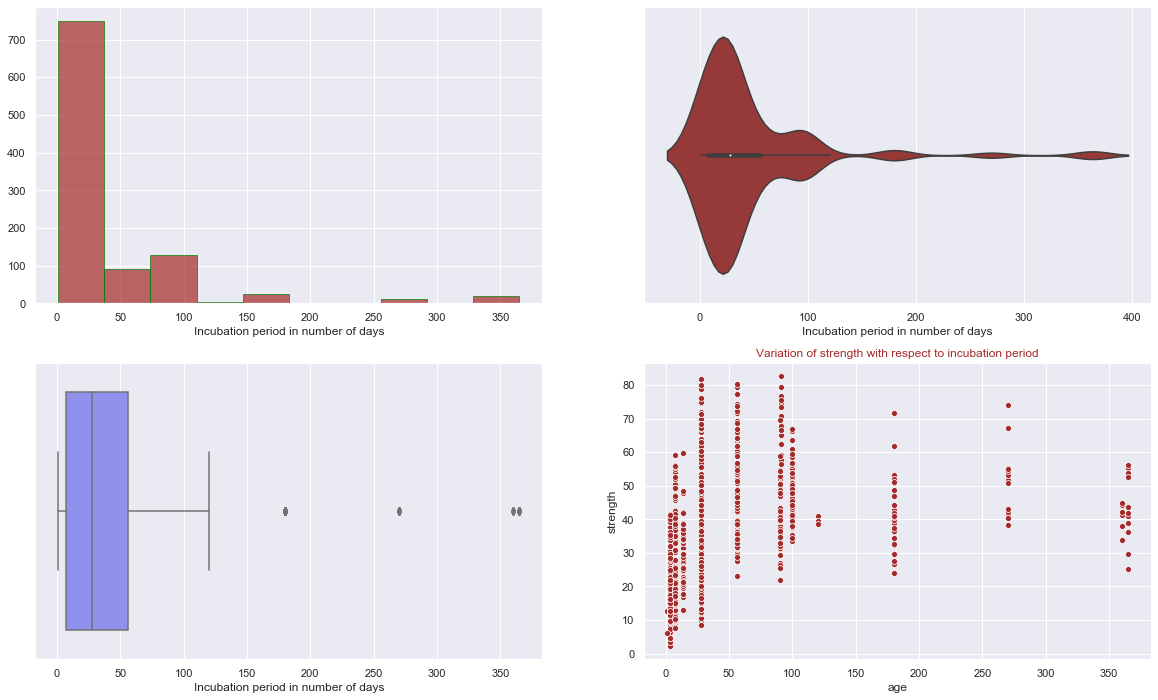

In [822]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.hist(df.age , color = 'brown', edgecolor = 'green', alpha = 0.7);
plt.xlabel('Incubation period in number of days')

plt.subplot(2,2,2)
sns.violinplot(df['age'], color = 'brown',edgecolor = 'green', alpha = 0.7)
plt.xlabel('Incubation period in number of days')

plt.subplot(2,2,3)
sns.boxplot(x = df.age,palette = 'gist_stern')
plt.xlabel('Incubation period in number of days');

plt.subplot(2,2,4)
sns.scatterplot(df.age, df.strength,color = 'brown');
plt.title('Variation of strength with respect to incubation period', color = 'brown');

### Observations:

<font color = blue>

- Age is a deciding factor for increase in strength. The compressive strength of the concrete increases with age. However, this increase in strength gets stagnated after one year. 

- As per the industry standard, 28 days period is the basic period to attain a level of compressive strength.

- In the histogram plot most of the data points are located between 0 to 100 days, and 0 to 25 days period has maximum count.

- Rarely some of the concrete were allowed to solidify and gain strength till a period of 350 days. The presence of multi Gaussian and multi modal indicates 3 to 4 clusters. And the violin plot clearly shows the skewness of data points towards right. The very long tail towards right indicates the presence of outliers in the column.

- The same can be noticed from box-whisker plot, and the outliers are located far away from the upper quartile range.


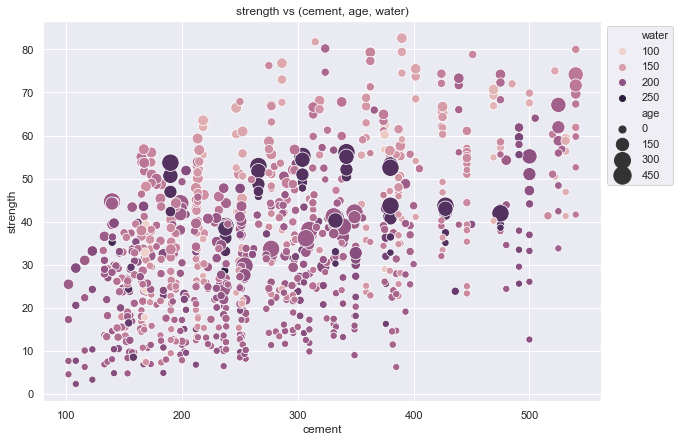

In [823]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (cement, age, water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations:

<font color = blue>

- It can be seen that, as the quantity of cement increases the strength also increases, and this is possible at a certain ratio of cement to water and at a certain age period. 

- Some points show that, at a less proportion of cement also concrete has a good strength and it is due to the proper quantity of water in it and a good time period to strengthen the concrete.


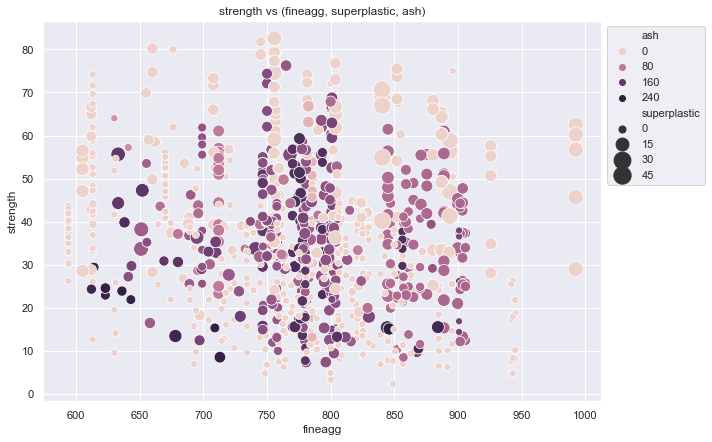

In [824]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=df, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (fineagg, superplastic, ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations:

<font color = blue>

- A linear relationship cannot be expected between fine aggregate and strength column. At extreme proportion of fine aggregate, ash quantity seems to be very less with minimum superplastic and a moderate value of strength.
    
- An optimal quantity of fine aggregate with equal amount of ash and super plastic give a good strength concrete.


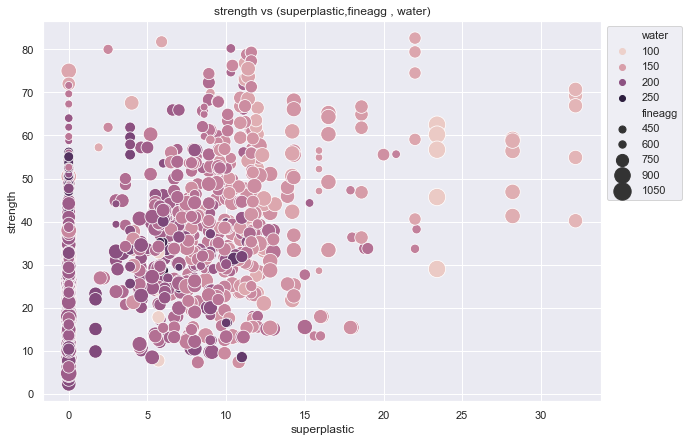

In [825]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="superplastic", hue="water", size="fineagg", data=df, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (superplastic,fineagg , water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations:

<font color = blue>

- Superplastic of around 5 to 25 with a quantity of 150-180 for water and 650 quantity value of fine aggregate mixture gives a good strength of concrete.
    
- Strength of concrete highly depends on the quantity of water present in it along with a fixed amount of fine aggregate. Dropping of superplastic completely from mixture has no effect on strength determination.  


In [826]:
# Preparing a pandas dataframe to store the skewness of each column.
Skewness = pd.DataFrame({'Skewness': [stats.skew(df.cement), stats.skew(df.slag), 
                                      stats.skew(df.ash), stats.skew(df.water), 
                                      stats.skew(df.superplastic), 
                                      stats.skew(df.coarseagg), stats.skew(df.fineagg),
                                      stats.skew(df.age), stats.skew(df.strength)]}, 
                        index = ['cement', 'slag', 'ash', 'water', 'superplastic',
                                 'coarseagg','fineagg', 'age', 'strength'])
Skewness

Skewness
cement        0.508739
slag          0.799550
ash           0.536571
water         0.074520
superplastic  0.905881
coarseagg    -0.040161
fineagg      -0.252641
age           3.264415
strength      0.416370

### Observations:

<font color = blue>

- Feature 'age' is highly right skewed due to presence of outliers, it is the time required to induce the strength into concrete, so some of the concretes have been kept for long days and allowed to strengthen by creating data points far away from IQR range.
    
- Features like 'superplastic', 'Slag', 'ash' and 'cement' are the ingredients which determine the strength of the concrete. By adding these in correct proportion enhances the strength. The skewness in these columns may be due to incorrect proportion of mixture. In some cases the proportion may be due to presence of too much higher or lower quantity of ingredients with respect others, thus, by exceeding the IQR range.


In [827]:
# Correlation of entire dataframe
corr_matrix = df.corr()
# Features more related to Strength of Concrete
corr_matrix['strength'].sort_values(ascending = False)

strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
slag            0.134829
ash            -0.105755
coarseagg      -0.164935
fineagg        -0.167241
water          -0.289633
Name: strength, dtype: float64

### Observations:

<font color = blue>


- Out of all features, cement has highest correlation value with target column followed by superplastic, age and slag.
  
- Though, the correlation is not linear or value nearly equal to 1 or -1, some of the independent features influence the strength column.


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.c. Multivariate analysis
<a id='3c'></a>

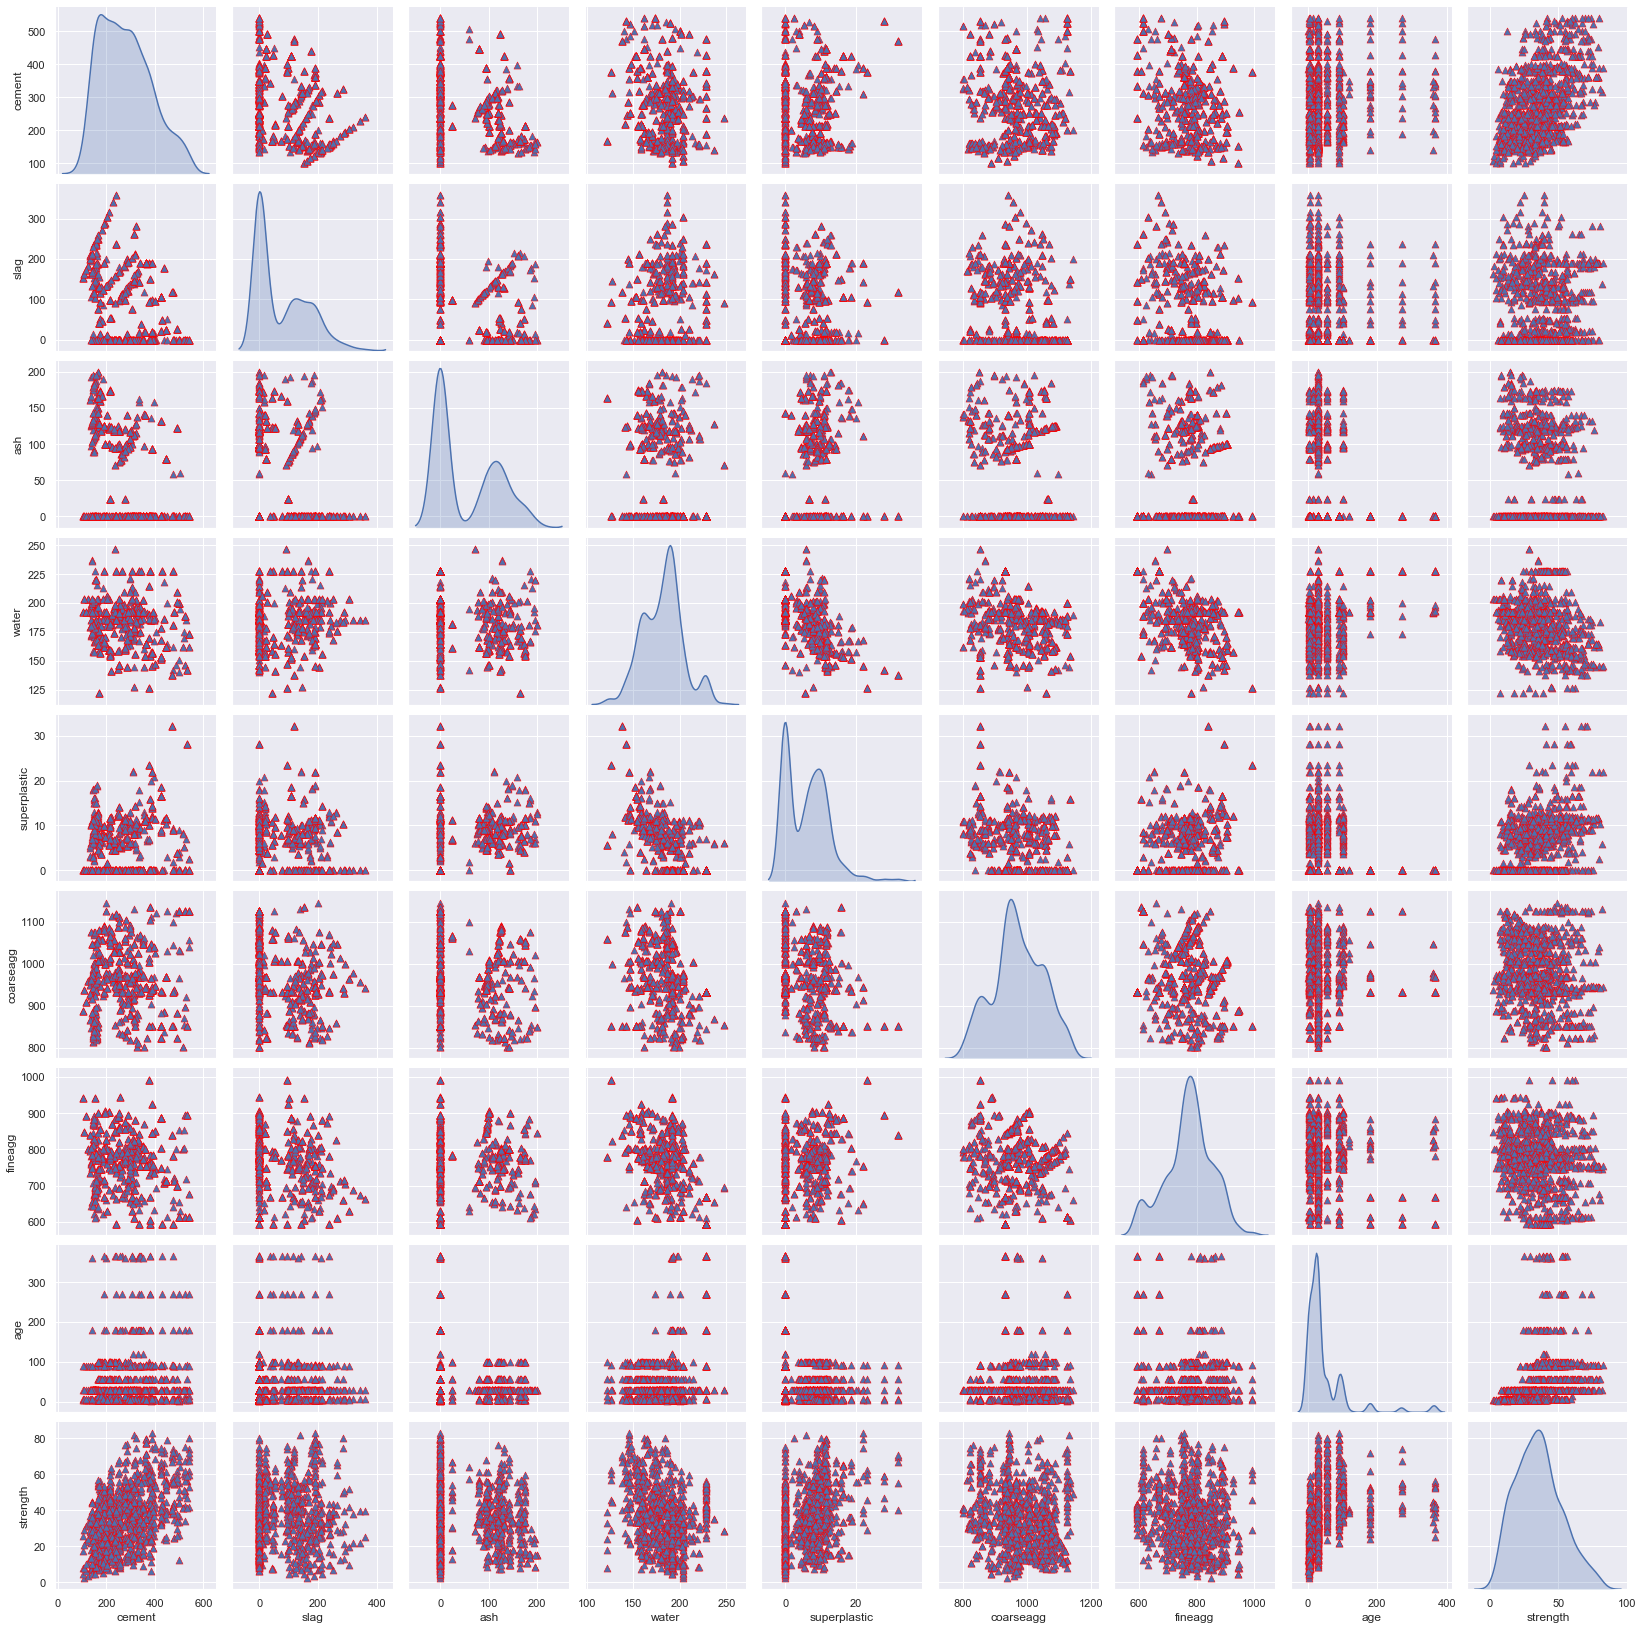

In [828]:
sns.pairplot(df, diag_kind = 'kde',  markers="^",palette = 'git_ow',
                      plot_kws=dict(s=50, edgecolor="red", linewidth=0.5),
                      diag_kws=dict(shade=True));

### Observations:

<font color = blue>

- The pair plot panel gives us some important visual observations among independent columns and target column.

- From the KDEs i.e. diagonal parts it can be observed that, there may be 2 to 7 clusters available in the entire dataset.

- Some of the columns are having a data cloud but the spread seems to be higher. 

- The collection of data except age column, gives almost a cloud with each other, however a linear vertical line can also be seen, which clearly indicates the accumulation of data points at a single value or record.

- The age column which ranges from 1 to 365, gives us almost 5 clusters, with 5 linear lines stating the count of days for each five records. 

- None of the columns are highly correlated, means none of them are influencing each other in any manner. So absence of multicollinearity can be felt among them.

- This is a good sign of relationship among independent attributes, and can faintly affect the model performance.

- Due to the presence of long tails, the leverage of outliers can be felt, and proper feature engineering is required to gain model performance.

- The relationship of all the independent attributes is nonlinear with target column.

- Except the cement column, all are having a poor correlation with target or strength column.

- Though the age column has a linear relationship with target column at different clusters, the slope seems to be equal to zero.

- Since, most of the data points are cluttered in scatter cloud for a mathematical space between target column and independent columns, a nonlinear relationship can be inferred among them signifying a poor correlation between target and independent attributes.

- Thus the columns having poor correlation values with target column can be merged and some composite attributes can be generated.


In [829]:
df.corr().T

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

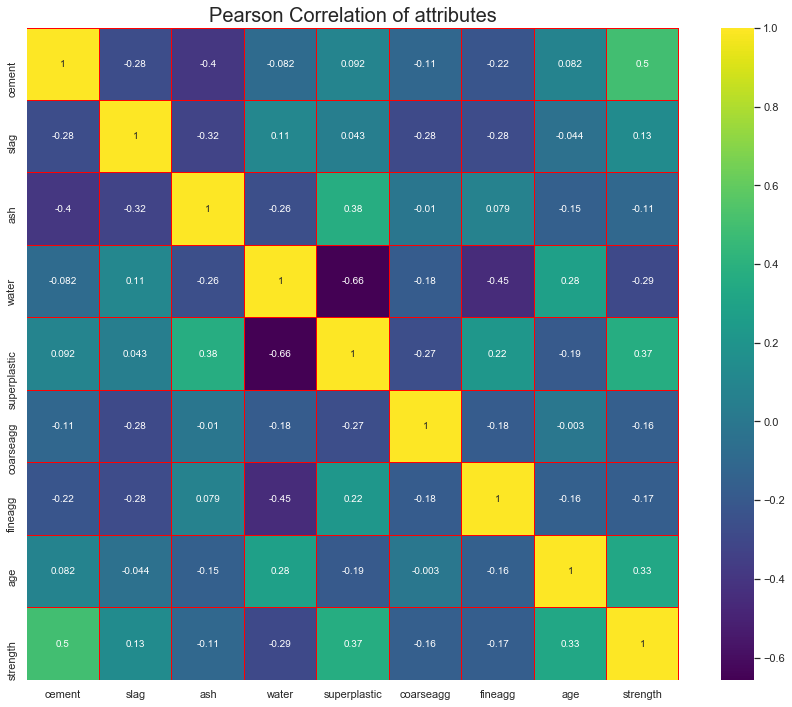

In [830]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (15,12))
plt.title('Pearson Correlation of attributes', y=1, size = 20)
sns.heatmap(df.corr(), linewidth = 0.2, vmax = 1.0,
           square = True,  cmap = colormap,linecolor = 'red', annot = True); 

### Observations:

<font color = blue>

- None of the columns are highly correlated to each other.

- The highest correlation among columns can be observed between superplastic and water, which is -0.66 means negatively correlated.

- The target column has a good correlation with cement column, however, none of the other columns has a good linear relationship with target column.

- The correlation value of some of the independent attributes with target is nearly equal, so merging of those columns can also be thought off.

- So, here we do not need to drop any columns based upon the correlation values rather we can create some composite attributes by merging the columns with very less or nearly equal correlation value with target column.


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.d. Comments
<a id='3d'></a>

<font color = blue>

- In this part we have cleaned the data by imputing various data cleaning mechanisms.

- The Exploratory Data Analysis has been carried out with the help of statistical description, Univariate, Bivariate & Multivariate plots, Correlation matrix, while checking for the IQR range, skewness of each attribute, correlation of independent attributes, mean, mode and median with standard deviation were also been calculated for each attribute.

- Box plots, Histogram Plots, Violin Plots for density curves and scatter plot between each independent variable with respect to target column were also been reflected.

- Outliers were also been detected with the help of Box plot for various attributes. 

- Mix of Gaussian has also been checked from pair plot. The probable clusters will be made in subsequent iteration part by using Unsupervised Learning process.

- Presence of Outliers will also be addressed in subsequent iteration parts to enhance the model performance.


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 4. Splitting of Dataset into training and testing & Scaling
<a id='STT'></a>

In [831]:
df_scaled  = df.apply(zscore)

In [832]:
# converting the numpy array back into a dataframe

df_scaled = pd.DataFrame(df_scaled, columns = df.columns )

In [833]:
df_scaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398 -0.312970   
1 -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141  0.282260   
2 -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121  1.093371   
3 -0.145209  0.465044 -0.847144  2.175461     -1.039143  -0.526517 -1.292542   
4 -1.209776  1.269798 -0.847144  0.549700      0.484905   0.958372 -0.959363   

        age  strength  
0 -0.279733 -0.355018  
1 -0.501465 -0.737108  
2 -0.279733 -0.395144  
3 -0.279733  0.600806  
4 -0.279733 -1.049727

In [834]:
X_scaled = df_scaled.drop('strength', axis=1)
y_scaled = df_scaled[['strength']]

In [835]:
# Split X and y into training and test set in 70:30 ratio

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [836]:
# checking the split of data
print('{0:0.2f}% data is in training set'.format((len(X_train_scaled)/len(df.index))*100))
print('{0:0.2f}% data is in testing set'.format((len(X_test_scaled)/len(df.index))*100))

70.00% data is in training set
30.00% data is in testing set


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 5. Iteration -1: With various Linear Models
<a id='I1'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   5.a. Train and test using various Linear Algorithms
<a id='I1a'></a>

<font color = copper>

### Linear Regression Model:



In [837]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [838]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678761
The coefficient for slag is 0.5620608749496463
The coefficient for ash is 0.347476771026321
The coefficient for water is -0.1318613837251486
The coefficient for superplastic is 0.1344987684064457
The coefficient for coarseagg is 0.1118368924153759
The coefficient for fineagg is 0.1737008031228733
The coefficient for age is 0.41759097790251387


In [839]:
intercept = lr_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.01304140022160526


In [840]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS


# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

lr_model_score_train = lr_model.score(X_train_scaled, y_train_scaled)

print('Training model Accuracy value: {0:0.2f}%'.format(lr_model_score_train*100))

lr_model_score_test = lr_model.score(X_test_scaled, y_test_scaled)
print('Testing Model Accuracy value: {0:0.2f}%'.format(lr_model_score_test*100))

# lr_model.score(X_test_scaled, y_test_scaled)

Training model Accuracy value: 60.31%
Testing Model Accuracy value: 63.39%


<font color = brown>
    
### Decision on Complexity of Model: Simple Linear Model or Quadratic Model?

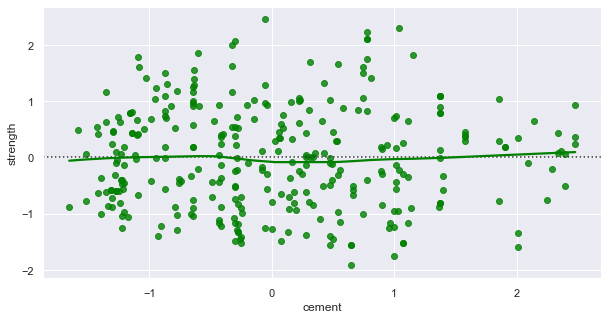

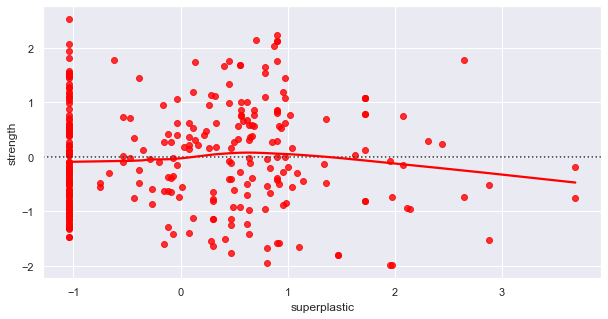

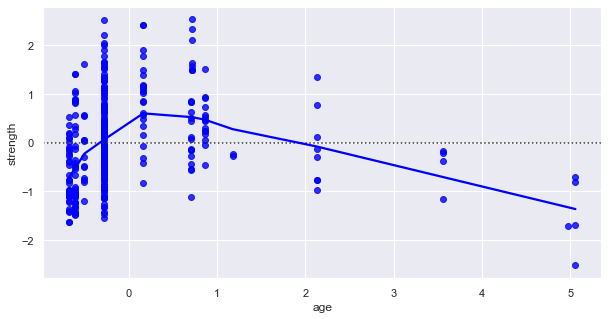

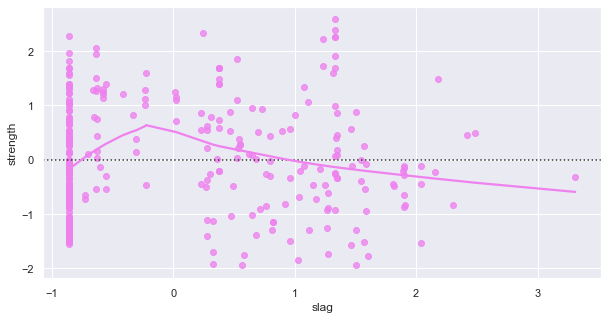

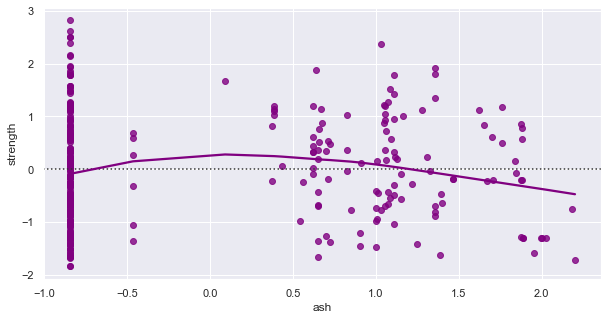

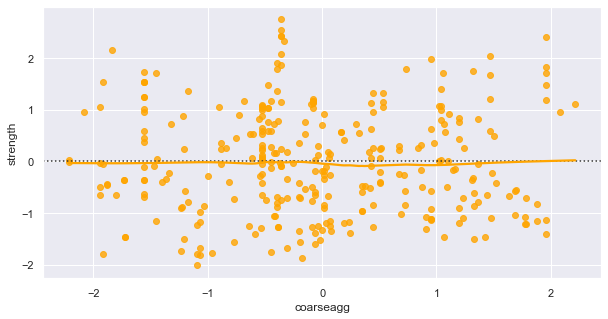

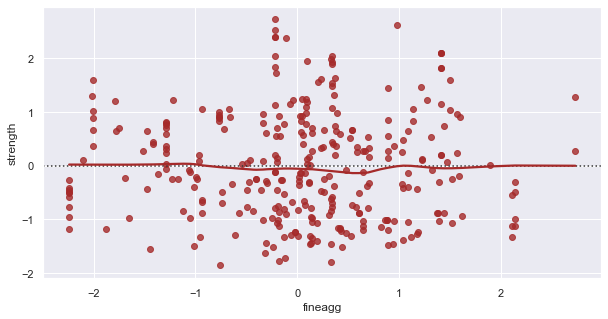

In [841]:
# Is OLS a good model ? Should we be building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['cement'], y= y_test_scaled['strength'], color='green', lowess=True )


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['superplastic'], y= y_test_scaled['strength'], color='red', lowess=True );


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['age'], y= y_test_scaled['strength'], color='blue', lowess=True );


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['slag'], y= y_test_scaled['strength'], color='violet', lowess=True );


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['ash'], y= y_test_scaled['strength'], color='purple', lowess=True );


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['coarseagg'], y= y_test_scaled['strength'], color='orange', lowess=True );


fig = plt.figure(figsize=(10,5))
sns.residplot(x= X_test_scaled['fineagg'], y= y_test_scaled['strength'], color='brown', lowess=True );


### Observations on model complexity:


<font color = blue>

- The term 'Linear' can be interpreted in two ways
    > Linearity in the variables - the independent variables x are raised to the power 1
    > Linearity in the parameters - The coefficient are raised to power 1, and x can be raised to any power.

- So, here linear model means, linear in terms of parameters, the power of coefficient should be raised to power one but x can be of any power.
      
- Complexity of the model also depends on the dimension we have included to build it. As the number of dimension increases, the complexity of the model also increases. 
    
- From the above residual plot the single pick and valley represents the model is quite linear in nature and simple. With more than one picks and valleys the model can be treated as quadratic model. 
    
- The Stochastic Disturbance or Stochastic Error term here is caused due to independent variables which are not taken into considerations, and this can be the error of disturbances which affects the target variable. 
    
- So from above graphical representation and fundamentals of Linear regression, it can be concluded that , the model will be simple linear model.
    
- Further, we will check this in Ridge and Lasso models below and can reach out to conclusion.


### Observations:

<font color = blue>

- So the model explains 64% of the variability in Y using X

- R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we can use adjusted R^2 which removes the statistical chance that improves R^2.

- Scikit does not provide a facility for adjusted R^2... so we use will be using statsmodel, a library that gives results similar to what you obtain in R language.

- This library expects the X and Y to be given in one single data frame

In [842]:
train_data = pd.concat([X_train_scaled, y_train_scaled], axis=1)
train_data.head()

cement      slag       ash     water  superplastic  coarseagg  \
185  0.658961 -0.856888 -0.847144  1.004164     -1.039143   0.013910   
286  0.888723  1.337055 -0.847144 -0.537264      0.652383  -0.602435   
600 -0.039901 -0.856888 -0.847144  0.441941     -1.039143  -0.063294   
691  0.946164  0.244722 -0.847144  2.175461     -1.039143  -0.526517   
474  0.716401 -0.856888  1.372788  0.535645      0.803113  -2.212138   

      fineagg       age  strength  
185  0.017714 -0.501465 -0.795799  
286 -0.210645  0.718062  1.741687  
600  1.028482 -0.675683 -1.464756  
691 -2.240917 -0.612331 -0.179544  
474  0.055149 -0.279733  0.302560

In [843]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = train_data).fit()
lm1.params

Intercept      -0.013041
cement          0.791708
slag            0.562061
ash             0.347477
water          -0.131861
superplastic    0.134499
coarseagg       0.111837
fineagg         0.173701
age             0.417591
dtype: float64

In [844]:
print(lm1.summary()) # Inferential Statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sun, 06 Sep 2020   Prob (F-statistic):          2.18e-137
Time:                        20:57:34   Log-Likelihood:                -683.03
No. Observations:                 721   AIC:                             1384.
Df Residuals:                     712   BIC:                             1425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0130      0.023     -0.557   

<font color = blue>


- Here, adjusted R^2 is also coming very less, in fact less than expected R^2 value. So we'll be using regularised Linear Regression models like Ridge and Lasso to increase the model score...


In [845]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((lr_model.predict(X_test_scaled)-y_test_scaled)**2)

In [846]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse)

0.618177114503482

- So there is an average of 0.61 (roundoff) predicted strength differene from real or actual strength.

Training model Accuracy value: 60.31%
Testing Model Accuracy value: 63.39%


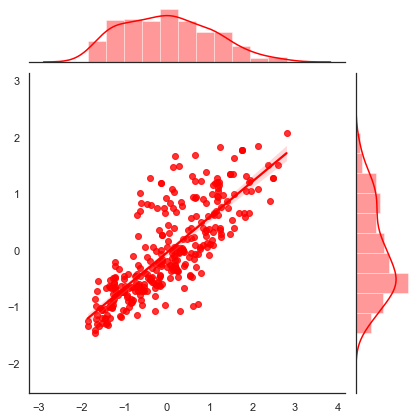

In [847]:
print('Training model Accuracy value: {0:0.2f}%'.format(lr_model_score_train*100))

print('Testing Model Accuracy value: {0:0.2f}%'.format(lr_model_score_test*100))


y_pred_scaled = lr_model.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_scaled), kind = 'reg', color = 'red')

### Observations:

<font color = blue>

- The scatter plot shown above is drawn between actual target feature and predicted target feature. 

- Though, the variation of points are linear in nature, the scattered points are located beyond a virtual linear line indicates the model incapacity to predict the target feature perfectly.

- Let us build regularised models to predict the target feature


<font color = copper>

### Regularized RIDGE Model:



In [848]:
ridge = Ridge(alpha=.3)      # Lambda or aplha or hyperparameter value = 0.3
ridge.fit(X_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))


Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


Training model Accuracy value: 60.31%
Testing Model Accuracy value: 63.40%


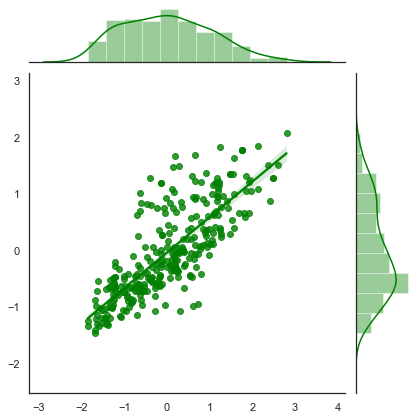

In [849]:
print('Training model Accuracy value: {0:0.2f}%'.format((ridge.score(X_train_scaled,y_train_scaled))*100))

print('Testing Model Accuracy value: {0:0.2f}%'.format((ridge.score(X_test_scaled, y_test_scaled))*100))

y_pred_scaled_ridge = ridge.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_scaled_ridge), kind = 'reg', color = 'green')

In [850]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse2 = np.mean((ridge.predict(X_test_scaled)-y_test_scaled)**2)

In [851]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse2)

0.6180760557197372

<font color = copper>

### Regularized LASSO Model:



In [852]:
lasso = Lasso(alpha=0.1)      # Lambda or aplha or hyperparameter value = 0.1
lasso.fit(X_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))



Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


- Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Training model Accuracy value: 52.16%
Testing Model Accuracy value: 51.86%


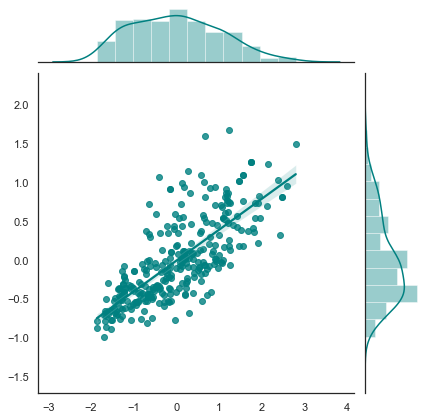

In [853]:
print('Training model Accuracy value: {0:0.2f}%'.format((lasso.score(X_train_scaled,y_train_scaled))*100))

print('Testing Model Accuracy value: {0:0.2f}%'.format((lasso.score(X_test_scaled, y_test_scaled))*100))

y_pred_scaled_lasso = lasso.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_scaled_lasso), kind = 'reg', color = 'teal')

### Observations on model complexity:


<font color = blue>


- Continuing the above discussion, we have built two regularised linear models.

- Both the models have tried to minimize the SSE (Sum of Square error) by finding out the least combination of variables.

- The ridge model has tried to push the coefficients towards zero by penalizing large magnitude coefficients while keeping the cost function same as linear un-regularised model.

- Thus by doing so, coefficient of some of the variables are dragged towards zero and made the model simple and prevented it from overfitting.
    
- Similarly, for Lasso model unlike Ridge, the penalty term makes the coefficients to zero which has high magnitude. Thus, by dropping the variable itself.
   
- This penalty term ensures the corresponding variable is totally dropped from the model building and makes the model much simpler and prevents it from overfitting. However the cost function is retained unaffected and almost equal to the cost function of non-regularised linear model.
    
> Thus from the above discussion, it can be concluded that, for this dataset we will be building very simple linear models and avoid any higher degree or quadratic in terms of parameters.

  

### Observations:

<Font color = Blue>


- The scatter plot shown above is drawn between actual target feature and predicted target feature for both Regularised Ridge and Lasso models. 

- Similarly, though, the variation of points are linear in nature, the scatterings of the points beyond a virtual linear line indicates the model shapelessness to predict the target feature perfectly.

- Here, Regularised models also failed to improve the score and prediction capability like un-regularised model. The scores are also nearly same to un-regularised model.

- Let us try to improve the scores by generating polynomial features for linear models which will reflect the non-linear interaction between some dimensions while considering the significant correlation among them.


<font color = brown>

### Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [854]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

# degree = 2: means we have allowed to creat polynomials upto the power 2 of the existing columns.
# interaction_only = True: those dimensions are taken which shows some correlation among them

In [855]:
X_poly= poly.fit_transform(X_scaled)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y_scaled, test_size=0.30, random_state= 10248)
X_train_p.shape

(721, 37)

- Thus, after imputing generation of polynomial features, we got some 37 number of total dimensions. Initially it was 9 dimensions including target column. Let's explore the score of non-regularised and regularised models by using these polynomial features.

### Fiting a simple non regularized linear model on poly features

- Fit the polynomial features to the models and check for the coefficients.

In [856]:
lr_model.fit(X_train_p, y_train_p)
print(lr_model.coef_[0])

[ 6.39972415e-17  7.34602554e-01  5.68042742e-01  3.39048716e-01
 -1.74984578e-01  2.16214883e-01 -1.12973623e-02  2.98548582e-02
  8.93807633e-01  9.92122871e-02  1.45588093e-01 -2.23719119e-01
 -2.21089909e-01  2.38849334e-02  3.07479840e-02  1.39685296e-01
  1.87415624e-01 -1.37371427e-01 -1.37124684e-01 -1.08772156e-02
  1.40871194e-01  2.39528051e-01 -1.54164381e-01 -2.29300129e-01
  5.89403027e-02  1.67826449e-01  3.41614739e-01 -9.69809217e-03
 -1.12419999e-01 -2.57775313e-02 -4.54021542e-02 -5.29730045e-02
 -6.25986274e-02  2.02895813e-01  8.05425167e-02  3.72501669e-02
  1.31563070e-01]


In [857]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse11 = np.mean((lr_model.predict(X_test_p)-y_test_p)**2)

In [858]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse11)

0.5061410103618659

In [859]:
ridge = Ridge(alpha =0.3)
ridge.fit(X_train_p, y_train_p)
print('Ridge model:', (ridge.coef_))

Ridge model: [[ 0.          0.72689315  0.55965677  0.33196901 -0.18016786  0.21667903
  -0.01522698  0.02323714  0.89202017  0.09776932  0.14448824 -0.22021188
  -0.21449324  0.02436072  0.03061528  0.13144826  0.18453406 -0.13482714
  -0.13122145 -0.01147661  0.1404346   0.23271311 -0.15148918 -0.22484575
   0.05810602  0.16703418  0.33292017 -0.00644743 -0.1108817  -0.02539434
  -0.05059566 -0.04914613 -0.05820805  0.20402028  0.08058942  0.03544339
   0.12496179]]


In [860]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse22 = np.mean((ridge.predict(X_test_p)-y_test_p)**2)

In [861]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse22)

0.5061958130880813

In [862]:
lasso = Lasso(alpha =0.2)
lasso.fit(X_train_p, y_train_p)
print('Lasso model:', (lasso.coef_))

Lasso model: [ 0.          0.29911105  0.01657977 -0.         -0.01049749  0.17274419
 -0.         -0.          0.15160356  0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.        ]


In [863]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse33 = np.mean(((lasso.predict(X_test_p)).reshape(309,1) -y_test_p)**2)

In [864]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse33)

0.7293533770527977

Training model Accuracy value for Linear Model: 76.74%
Testing Model Accuracy value for Linear Model: 69.97%


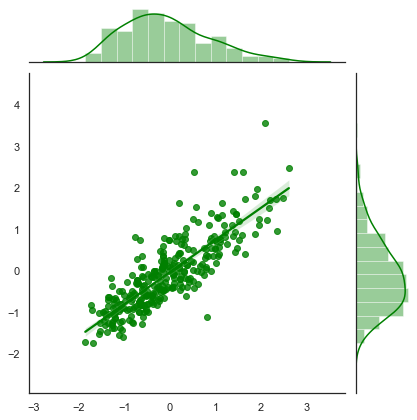

In [865]:
print('Training model Accuracy value for Linear Model: {0:0.2f}%'.format((lr_model.score(X_train_p, y_train_p))*100))

print('Testing Model Accuracy value for Linear Model: {0:0.2f}%'.format((lr_model.score(X_test_p, y_test_p))*100))


y_pred_scaled_lr = lr_model.predict(X_test_p)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_p, y = pd.DataFrame(y_pred_scaled_lr), kind = 'reg', color = 'green')

Training model Accuracy value for Ridge Model: 76.74%
Testing Model Accuracy value for Ridge Model: 69.96%


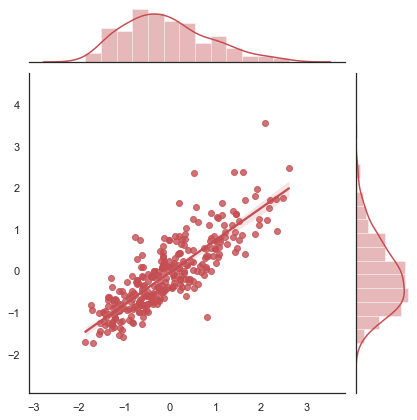

In [866]:
print('Training model Accuracy value for Ridge Model: {0:0.2f}%'.format((ridge.score(X_train_p, y_train_p))*100))

print('Testing Model Accuracy value for Ridge Model: {0:0.2f}%'.format((ridge.score(X_test_p, y_test_p))*100))


y_pred_scaled_ridge_p = ridge.predict(X_test_p)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_p, y = pd.DataFrame(y_pred_scaled_ridge_p), kind = 'reg', color = 'r')

Training model Accuracy value for Lasso Model: 38.58%
Testing Model Accuracy value for Lasso Model: 37.63%


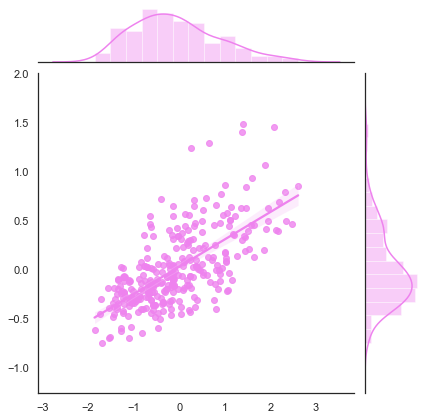

In [867]:
print('Training model Accuracy value for Lasso Model: {0:0.2f}%'.format((lasso.score(X_train_p, y_train_p))*100))

print('Testing Model Accuracy value for Lasso Model: {0:0.2f}%'.format((lasso.score(X_test_p, y_test_p))*100))


y_pred_scaled_lasso_p = lasso.predict(X_test_p)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_p, y = pd.DataFrame(y_pred_scaled_lasso_p), kind = 'reg', color = 'violet')

### Observations:

<font color = Blue>

- More or less similar results for linear regression and ridge models but lasso has a very low score with only four polynomial features and less complex model , as complexity is a function of variables and coefficients.

- But in case of Ridge and un-regularised model the dimensions are almost same.


<font color = brown>

### Feature Importance for the individual Features

In [868]:
#ways of dropping variables:
#significance of variables (p-values)
#VIF--variance inflation factor

#Computing VIF
#VIF=1/1-r^2
#create a dataframe which will contain all the features and their respective VIF values
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
0        cement  7.49
1          slag  7.28
6       fineagg  6.65
3         water  6.41
2           ash  6.29
5     coarseagg  4.76
4  superplastic  2.71
7           age  1.14

### Observations:

<font color = blue>

- None of the column are having very high VIF value, so we may not be required to drop any of them. However some composite columns can be formed to check the model performance.

- Based upon the VIF score of ash & slag, their correlation with target column and the importance in strengthening the concrete we can merge these two columns, and create a composite column.


<font color = copper>

### Decision Tree Regressor:



In [869]:
dtr_model = DecisionTreeRegressor(random_state=0, max_depth=3)

dtr_model.fit(X_train_scaled, y_train_scaled)
y_pred = dtr_model.predict(X_test_scaled)

Training model Accuracy value for Decision Tree Regressor Model: 63.58%
Testing Model Accuracy value for Decision Tree Regressor Model: 58.31%


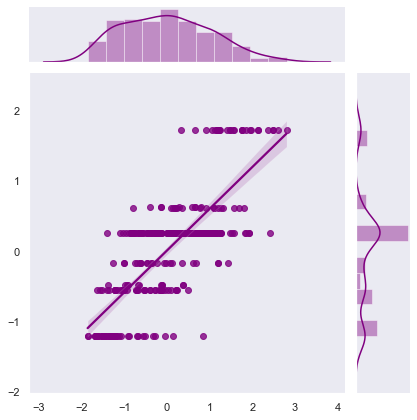

In [870]:
print('Training model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_train_scaled, y_train_scaled))*100))

print('Testing Model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_test_scaled, y_test_scaled))*100))


sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('dark'):
    sns.jointplot(x = y_test_scaled, y=pd.DataFrame(y_pred), kind = 'reg', color = 'purple')

In [871]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse4 = np.mean((y_pred.reshape(309,1) - y_test_scaled)**2)

In [872]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse4)

0.6596825058691177

In [873]:
feature_importances = dtr_model.feature_importances_

feature_names = df.columns[0:8]
print(feature_names)

k=8
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.46405785 0.         0.         0.08815856 0.         0.
 0.         0.44778359]
Index(['cement', 'age', 'water', 'fineagg', 'coarseagg', 'superplastic', 'ash',
       'slag'],
      dtype='object') [0.46405785 0.         0.         0.08815856 0.         0.
 0.         0.44778359]


### Observations on Feature Importance:

<font color = blue>
    
- Among all features, columns like cement, water and age are highly important features in case of decision tree regression model.

- These columns play important role determining the model performance.

- Here we got a model performance score of 58% which is very low. We will explore further to enhance the model performance 


<font color = copper>

### Support Vector Regressor:



In [874]:
from sklearn import svm
clr = svm.SVR()
clr.fit(X_train_scaled, y_train_scaled)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Training model Accuracy value for Support Vector Regressor Model: 87.80%
Testing Model Accuracy value for Support Vector Regressor Model: 82.94%


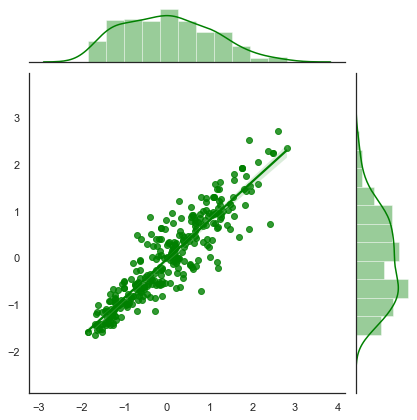

In [875]:
print('Training model Accuracy value for Support Vector Regressor Model: {0:0.2f}%'.format((clr.score(X_train_scaled, y_train_scaled))*100))

print('Testing Model Accuracy value for Support Vector Regressor Model: {0:0.2f}%'.format((clr.score(X_test_scaled, y_test_scaled))*100))



y_pred_clr = clr.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_clr), kind = 'reg', color = 'green')

In [876]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse5 = np.mean(((clr.predict(X_test_scaled)).reshape(309,1) -y_test_scaled)**2)

In [877]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse5)

0.42194717792876646

### Observations:

<font color = blue>

- Here, we got a very good score of 82%, which is the best among all the models.

- Let's explore a bit more to enhance the model performance.

<font color = copper>

### Random Forest Regressor:



In [878]:
rfr = RandomForestRegressor(n_estimators = 50, random_state = 559, max_features = 8 )
rfr = rfr.fit(X_train_scaled, y_train_scaled)


Training model Accuracy value for Random Forest Regressor Model: 98.30%
Testing Model Accuracy value for Random Forest Regressor Model: 90.36%


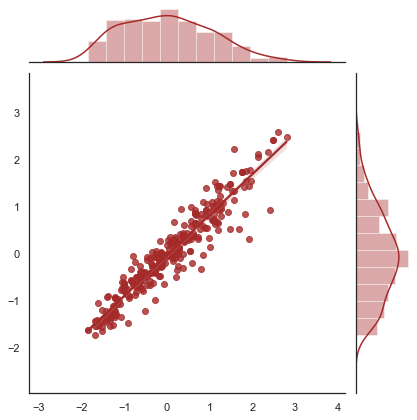

In [879]:
print('Training model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_train_scaled, y_train_scaled))*100))

print('Testing Model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_test_scaled, y_test_scaled))*100))


y_predict_rfr = rfr.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_predict_rfr), kind = 'reg', color = 'brown')

In [880]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse6 = np.mean(((rfr.predict(X_test_scaled)).reshape(309,1) -y_test_scaled)**2)

In [881]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse6)

0.31726725280001633

### Observations:

<font color = blue>

- Here, we got a very good score of 90.36%, which is the best among all the models.

- Let's explore a bit more to enhance the model performance.

<font color = copper>

### XGBoost Regressor:



In [882]:
xgbr = xgboost.XGBRegressor()
xgbr.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Training model Accuracy value for XGBoost Regressor Model: 99.43%
Testing Model Accuracy value for XGBoost Regressor Model: 92.20%


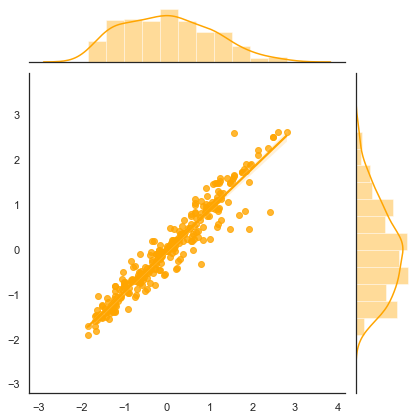

In [883]:
# Predicting the Test set results

print('Training model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_train_scaled, y_train_scaled))*100))

print('Testing Model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_test_scaled, y_test_scaled))*100))


y_pred_xgbr = xgbr.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_xgbr), kind = 'reg', color = 'orange')

In [884]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse7 = np.mean(((xgbr.predict(X_test_scaled)).reshape(309,1) -y_test_scaled)**2)

In [885]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse7)

0.2854185223578459

### Observations:

<font color = blue>

- Here, we got a very good score of 92.20%, which is the best among all the models.

- Let's explore a bit more to enhance the model performance.

<font color = copper>

### Gradient Boost Regressor:



In [886]:
gbr =  GradientBoostingRegressor(n_estimators = 50, random_state = 559, max_features = 8 )
gbr.fit(X_train_scaled, y_train_scaled)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=559, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training model Accuracy value for Gradient Boost Regressor Model: 91.53%
Testing Model Accuracy value for Gradient Boost Regressor Model: 86.62%


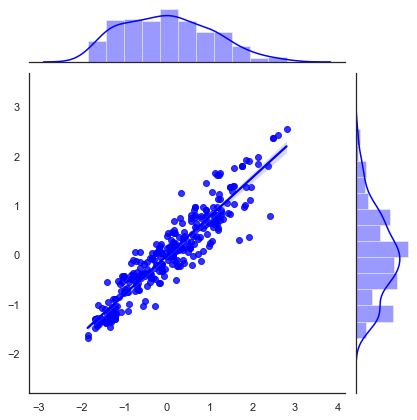

In [887]:
# Predicting the Test set results

print('Training model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_train_scaled, y_train_scaled))*100))

print('Testing Model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_test_scaled, y_test_scaled))*100))

y_pred_gbr = gbr.predict(X_test_scaled)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_scaled, y = pd.DataFrame(y_pred_gbr), kind = 'reg', color = 'blue')

In [888]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse8 = np.mean(((gbr.predict(X_test_scaled)).reshape(309,1) -y_test_scaled)**2)

In [889]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse8)

0.3737391244999938

### Observations:

<font color = blue>

- Here, we got a very good score of 86.61%, which is the best among all the models.

- Let's explore a bit more to enhance the model performance.

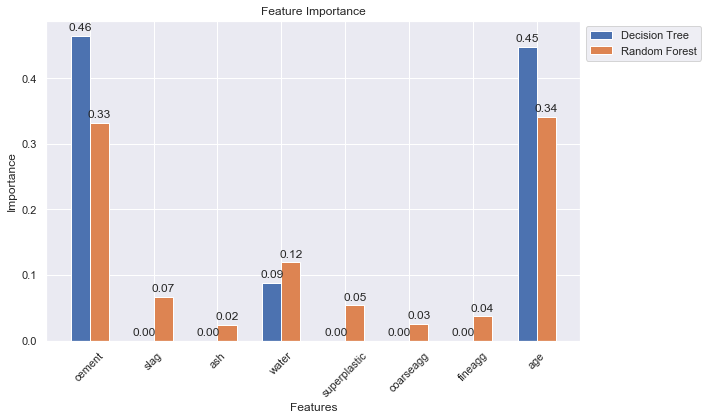

In [890]:
req_col_names = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']

feature_dtr = dtr_model.feature_importances_
feature_rfr = rfr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Observations for feature importance:

<Font color = blue>

- The columns like Cement and age are highly important columns based on their importance values from tree based models like Decision Tree and Random Forest.
    
- Other columns like water is also important based upon the importance values given by two tree based models.
    
- So, these three features are important features in terms of calculation of model score and minimisation of cost function.
    
- Rest of the columns are also required to calculate the model score.
    
- However, As per Decision tree, only cement, water and age are important columns and rest of the columns can be dropped out from calculation. This is what makes the model simpler and prevents it from overfitting.
    
- Random forest model has given importance to each of the columns, but it is almost negligible 


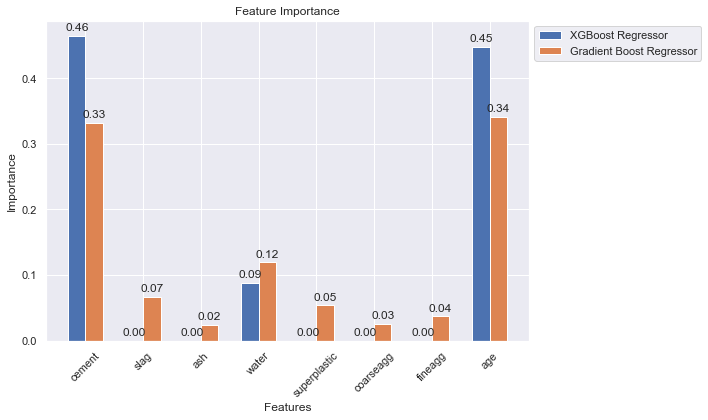

In [892]:
req_col_names = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']

feature_xgbr = xgbr.feature_importances_
feature_gbr = gbr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='XGBoost Regressor')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Gradient Boost Regressor')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Observations for feature importance:

<Font color = blue>

- The discussion for feature importance is also similar for both XGBoost Regressor and Gradient Boost Regressor.

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   5.b. Model building using KFold CV
<a id='I1b'></a>

In [893]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 235

kfold = KFold(n_splits = num_folds, random_state = seed)
result_lr = cross_val_score(lr_model, X_scaled, y_scaled, cv = kfold)
print(result_lr)
print('\n')
print('Model Score in itteration 1 for Linear Regression:%.3f%% (%.3f%%)'%(result_lr.mean()*100.0, result_lr.std()*100.0))

print('\n')
result_ridge = cross_val_score(ridge, X_scaled, y_scaled, cv = kfold)
print(result_ridge)
print('\n')
print('Model Score  in itteration 1 for Ridge:%.3f%% (%.3f%%)'%(result_ridge.mean()*100.0, result_ridge.std()*100.0))

print('\n')
result_lasso = cross_val_score(lasso, X_scaled, y_scaled, cv = kfold)
print(result_lasso)
print('\n')
print('Model Score  in itteration 1 for Lasso:%.3f%% (%.3f%%)'%(result_lasso.mean()*100.0, result_lasso.std()*100.0))

print('\n')
result_DTR = cross_val_score(dtr_model, X_scaled, y_scaled, cv = kfold)
print(result_DTR)
print('\n')
print('Model Score  in itteration 1 for Desission Tree Regressor:%.3f%% (%.3f%%)'%(result_DTR.mean()*100.0, result_DTR.std()*100.0))

print('\n')
result_clr = cross_val_score(clr, X_scaled, y_scaled, cv = kfold)
print(result_clr)
print('\n')
print('Model Score  in itteration 1 for Support Vector Regressor:%.3f%% (%.3f%%)'%(result_clr.mean()*100.0, result_clr.std()*100.0))

print('\n')
result_rfr = cross_val_score(rfr, X_scaled, y_scaled, cv = kfold)
print(result_rfr)
print('\n')
print('Model Score  in itteration 1 for Random Forest Regressor:%.3f%% (%.3f%%)'%(result_rfr.mean()*100.0, result_rfr.std()*100.0))

print('\n')
result_xgbr = cross_val_score(xgbr, X_scaled, y_scaled, cv = kfold)
print(result_xgbr)
print('\n')
print('Model Score  in itteration 1 for XGBoost Regressor:%.3f%% (%.3f%%)'%(result_xgbr.mean()*100.0, result_xgbr.std()*100.0))

print('\n')
result_gbr = cross_val_score(gbr, X_scaled, y_scaled, cv = kfold)
print(result_gbr)
print('\n')
print('Model Score  in itteration 1 for Gradient Boosting Regressor:%.3f%% (%.3f%%)'%(result_gbr.mean()*100.0, result_gbr.std()*100.0))

[0.47614371 0.67567905 0.69840899 0.57072063 0.54738709 0.68539964
 0.59863602 0.61651603 0.50396964 0.54624389]


Model Score in itteration 1 for Linear Regression:59.191% (7.308%)


[0.47645386 0.67559931 0.69851367 0.57084948 0.54756787 0.68514082
 0.59855102 0.61645325 0.50379018 0.54631849]


Model Score  in itteration 1 for Ridge:59.192% (7.300%)


[0.41551766 0.32938775 0.43235795 0.34052628 0.2892517  0.37209478
 0.22944998 0.36561236 0.29240362 0.31677507]


Model Score  in itteration 1 for Lasso:33.834% (5.797%)


[0.57487956 0.51803811 0.62886549 0.51395936 0.65347435 0.69471346
 0.66286365 0.66575227 0.50971086 0.58253734]


Model Score  in itteration 1 for Desission Tree Regressor:60.048% (6.644%)


[0.83003812 0.83733469 0.88099832 0.82125079 0.7863025  0.86361926
 0.87568031 0.86103976 0.80961132 0.82391015]


Model Score  in itteration 1 for Support Vector Regressor:83.898% (2.910%)


[0.8757276  0.89030705 0.95701515 0.91619975 0.88700427 0.93466806
 0.93812086 0.92257

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   5.c. Observations on Model Score
<a id='I1c'></a>

In [894]:
result_itteration1 = pd.DataFrame({'Algorithm' : ['Linear Regression', 'Ridge', 'Lasso','Deision Tree', 'Support Vector', 
                                      'Random Forest', 'XGBoost', 'GradientBoost'],
                      'Model_score': [lr_model.score(X_test_p, y_test_p)*100.0, ridge.score(X_test_p, y_test_p)*100.0,
                                         lasso.score(X_test_p, y_test_p)*100.0, dtr_model.score(X_test_scaled, y_test_scaled)*100.0,
                                         clr.score(X_test_scaled, y_test_scaled)*100.0, rfr.score(X_test_scaled, y_test_scaled)*100.0,
                                         xgbr.score(X_test_scaled, y_test_scaled)*100.0, gbr.score(X_test_scaled, y_test_scaled)*100.0],
                       
                       
                      'Root Mean Square Error' : [math.sqrt(mse11), math.sqrt(mse22), math.sqrt(mse33), 
                                           math.sqrt(mse4), math.sqrt(mse5), math.sqrt(mse6), 
                                           math.sqrt(mse7), math.sqrt(mse8)],
                                   
                      'Cross_val_score' : [result_lr.mean()*100.0, result_ridge.mean()*100.0, result_lasso.mean()*100.0, 
                                           result_DTR.mean()*100.0, result_clr.mean()*100.0, result_rfr.mean()*100.0, 
                                           result_xgbr.mean()*100.0, result_gbr.mean()*100.0],
                       
                      'Std_Dev':[result_lr.std()*100.0, result_ridge.std()*100.0, result_lasso.std()*100.0,
                                 result_DTR.std()*100.0, result_clr.std()*100.0, result_rfr.std()*100.0, 
                                 result_xgbr.std()*100.0, result_gbr.std()*100.0]})
result_itteration1

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    69.965042                0.506141        59.191047   
1              Ridge    69.958537                0.506196        59.192380   
2              Lasso    37.632265                0.729353        33.833772   
3       Deision Tree    58.310412                0.659683        60.047945   
4     Support Vector    82.944132                0.421947        83.897852   
5      Random Forest    90.357089                0.317267        91.578826   
6            XGBoost    92.195915                0.285419        93.556535   
7      GradientBoost    86.618808                0.373739        87.411868   

    Std_Dev  
0  7.307688  
1  7.300019  
2  5.797047  
3  6.644179  
4  2.909932  
5  2.396392  
6  2.498270  
7  2.211392

<font color = blue>

- In Linear Regression Analysis, Cost function is the Root mean Square error, and we need to minimize it. The model which gives minimum RMSE value is the suitable model to go with. So here, XGBoost has the lowest RMSE value, and can be chosen for further analysis. However, model score also plays an important role to decide the accurate model. 
    
- Among all models XGBoost has maximum score with train_test_split method, 

- Similarly among all the models XGBoost has also maximum cross validation score with a standard deviation of 2.49.

- Cross validation score of Linear regression, Ridge and Lasso models are less than normal score, this is because, in normal score we have considered the features with the help of polynomial Feature Elimination.

- However, without adopting polynomial features these three models give a score almost similar to cross validation score.

- We will try to explore more about the scores and enhance the model performance by addressing the outliers present in the features. 


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.2em ;color:Purple;"> 6. Iteration -2: Addressing Mix of Gaussian, Generation of Clusters, Addressing Outliers, Modeling Building
<a id='I2'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:green;">   6.a. Determining Mix of Gaussian
<a id='I2a'></a>

<font color = blue>


- The data seems to be a mix of Gaussians, thus exploring more from the pair panel visual inspection, and we can expect 4 to 5 clusters from this dataset.

- Thus, we will be restricting our clusters from 3 to 8.

- To build the clusters we will be using K-Means Clustering Technique from Unsupervised Learning


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:green;">   6.b. Generation of Clusters by Using K-Means Culstering
<a id='I2b'></a>

In [895]:
cluster_range = range (3,12)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans (num_clusters, n_init = 5)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:30]

num_clusters  cluster_errors
0             3    2.499578e+07
1             4    2.198953e+07
2             5    1.953573e+07
3             6    1.783023e+07
4             7    1.640984e+07
5             8    1.466079e+07
6             9    1.347383e+07
7            10    1.248042e+07
8            11    1.148397e+07

- The above pivot table shows us the cluster error for each cluster

- Let's draw the Elbow Plot to see the number of clusters 


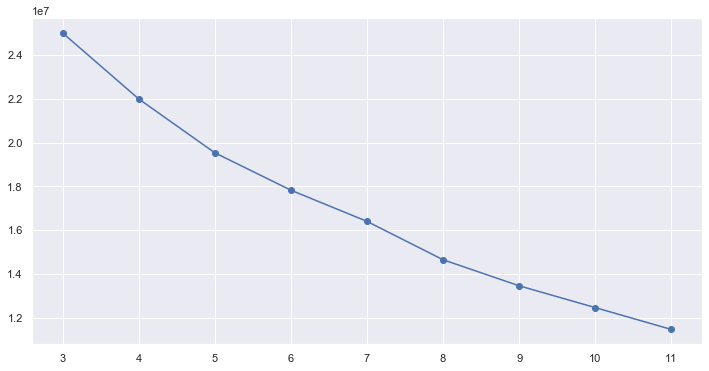

In [896]:
# Elbow Plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o');

- The elbow plot confirms our visual analysis that there are likely 5 or 8 clusters.
- Let us start with 5 clusters

In [897]:
cluster = KMeans(n_clusters = 8, random_state = 2535)
cluster.fit(df_scaled)

prediction = cluster.predict(df_scaled)
# Creating a new column 'GROUP' which will hold the cluster id of each record
df_scaled['GROUP'] = prediction

# Creating a mirror copy for later re-use instead of building repeatedly 
df_scaled_copy = df_scaled.copy(deep = True)

- let's see the centroids of these clusters

In [898]:
centroids = cluster.cluster_centers_
centroids

array([[-5.84357704e-01, -6.52474867e-01,  1.11079472e+00,
        -6.21917608e-01,  3.99539649e-01,  5.90408503e-01,
         4.06974789e-01, -1.22264538e-01, -1.79261899e-01],
       [ 6.36751835e-01,  9.31678239e-01, -6.09935220e-01,
        -5.60205247e-01,  6.84434711e-01, -1.89071674e-01,
        -4.33119682e-01, -1.76103365e-01,  1.14043980e+00],
       [ 4.94141497e-01, -3.83486490e-03, -8.47143932e-01,
         1.66335905e+00, -1.03914281e+00, -1.91547887e-01,
        -1.20565574e+00,  3.91034176e+00,  6.03633443e-01],
       [-8.96869437e-01,  1.36310863e+00, -8.37447314e-01,
         5.67936853e-01, -7.71920331e-01, -3.27458291e-02,
        -1.06243363e-01, -2.46753962e-01, -6.38902094e-01],
       [-4.15036915e-01,  1.87711454e-01,  1.10377802e+00,
         5.75748454e-01,  4.02791016e-01, -1.21882778e+00,
        -3.56859274e-01, -2.99116948e-01, -2.12049391e-01],
       [ 1.71106634e+00, -6.00162481e-01, -7.53600282e-01,
         7.18981498e-01, -8.74959664e-01,  6.246234

- Instead of interpreting the numerical values of the centroids, let us do a visual analysis by converting the centroids and the data in the cluster into box plots. 

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.c. Addressing Outliers
<a id='I2c'></a>

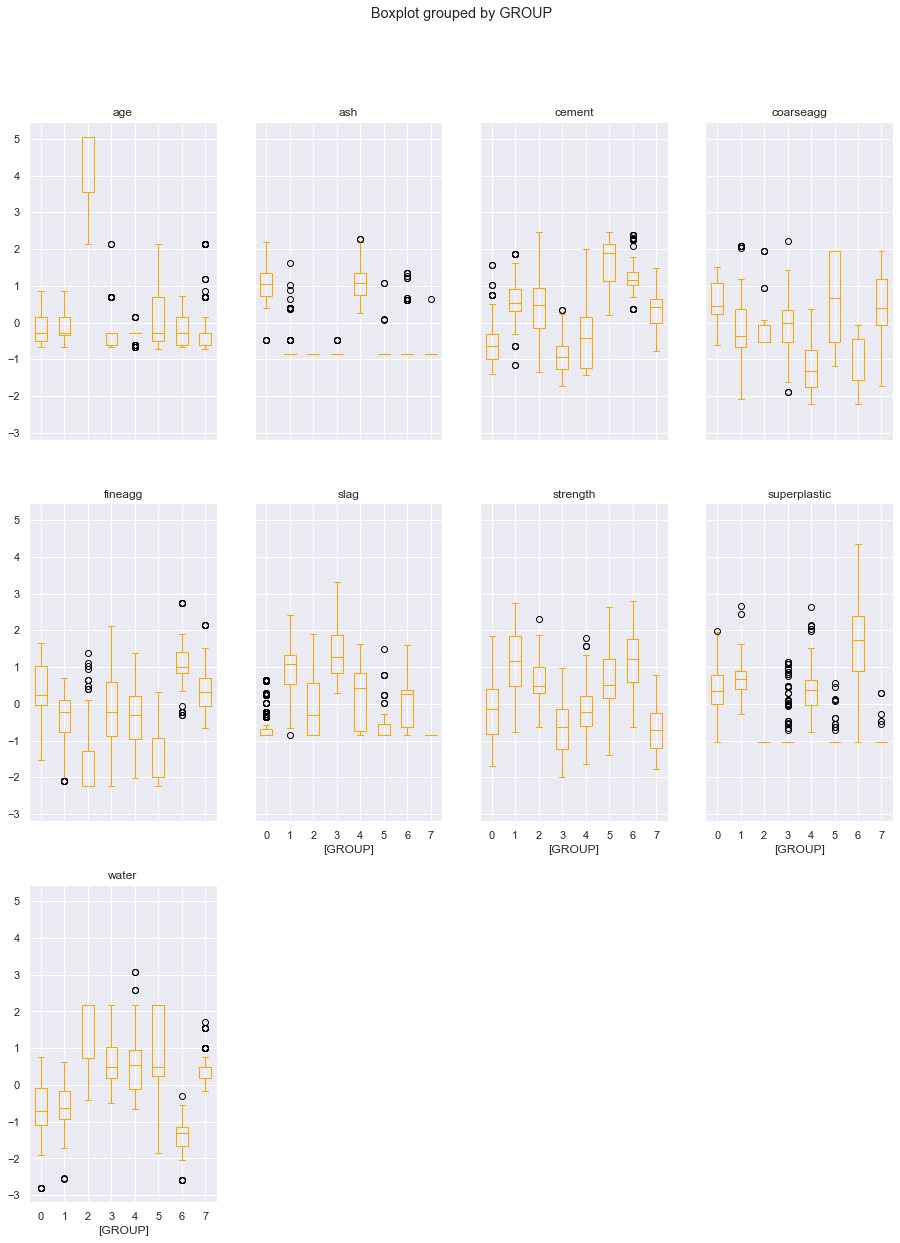

In [899]:
df_scaled.boxplot(by = 'GROUP', layout = (3,4), figsize = (15,20), color = 'orange');

<font color = blue>


- Many outliers can be seen on each dimension (indicated by the black circle)
- Spread of data on each dimension (indicated by the whiskers is long....due to the outliers)
- If the outliers are addressed, the clusters will overlap much


In [900]:
# Addressing the outliers at group level

def replace(group):
    median, std = group.median(), group.std()  # Get the median and the standard deviation of every group
    outliers = (group - median).abs()> 2*std  # Subtract median from every member of each group. Take absolute values > 2 std. dev
    group[outliers] = group.median()
    return group

df_corrected = (df_scaled.groupby('GROUP').transform(replace))
concat_data = df_corrected.join(pd.DataFrame(df_scaled['GROUP']))

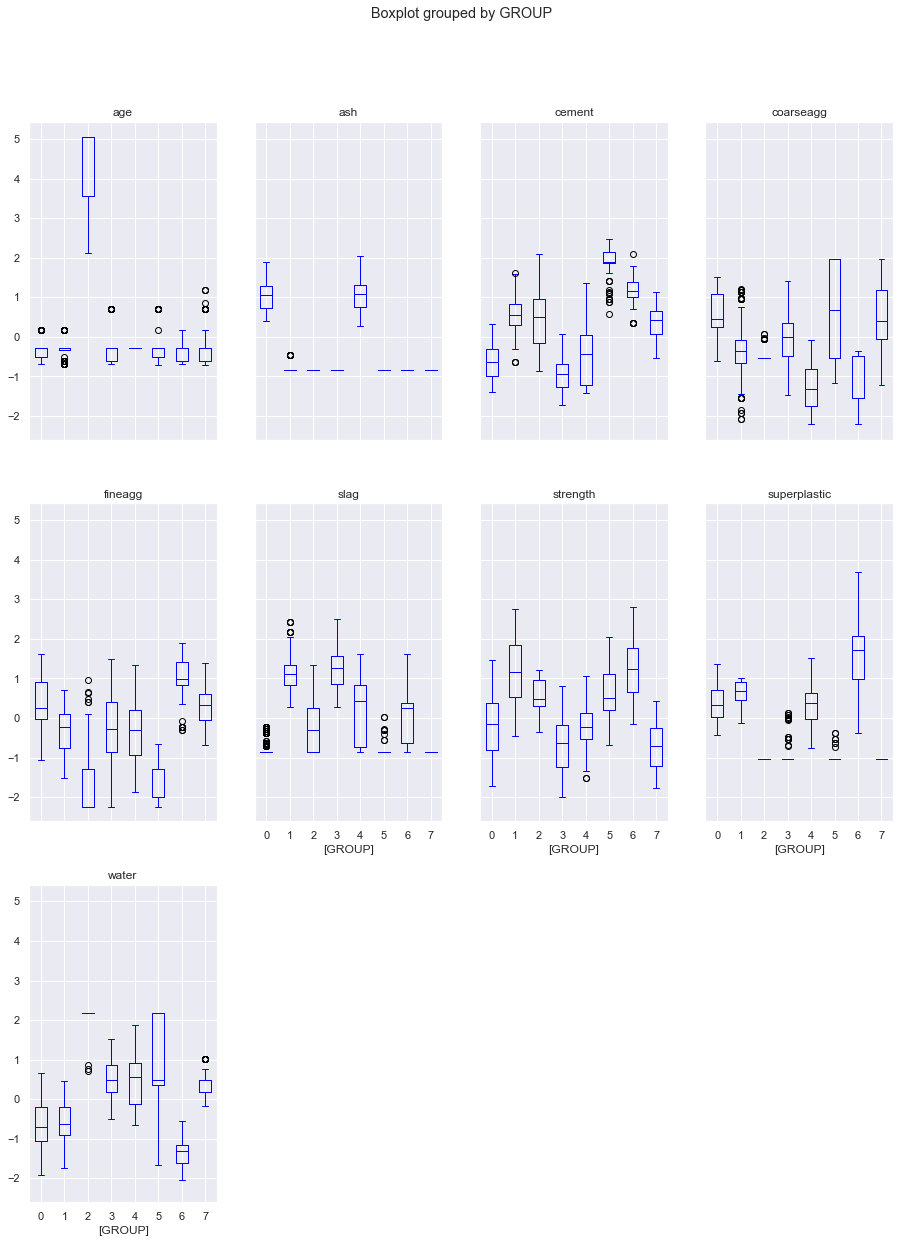

In [901]:
concat_data.boxplot(by = 'GROUP', layout = (3,4), figsize = (15,20), color = 'blue');

<font color = blue>
    
- NOTE: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.

- By replacing outliers, forcefully we created some new outliers by making the boundary much tighter. 


### Let us analyze the target column vs other columns group wise 

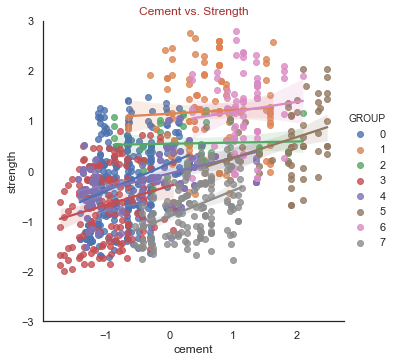

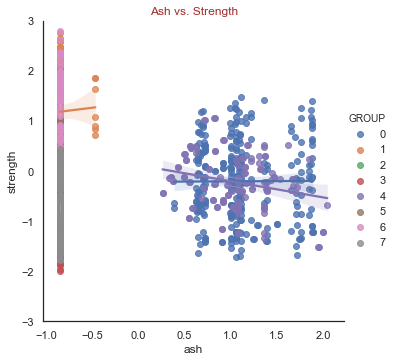

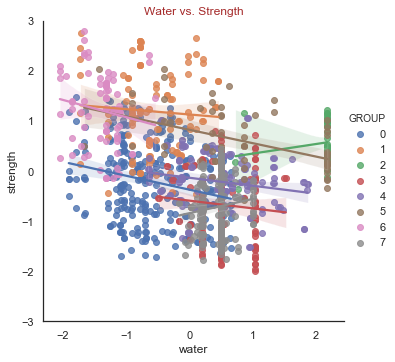

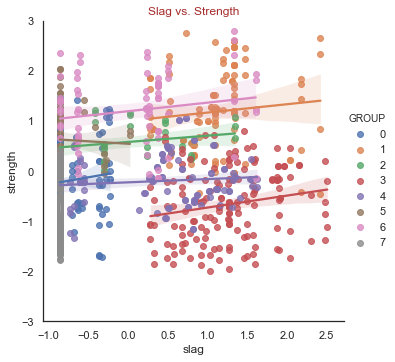

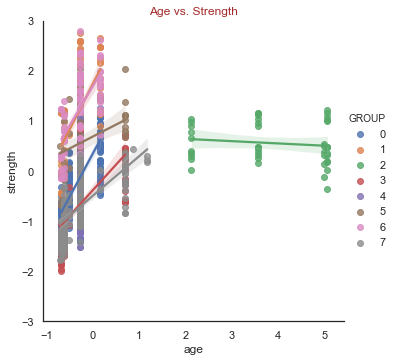

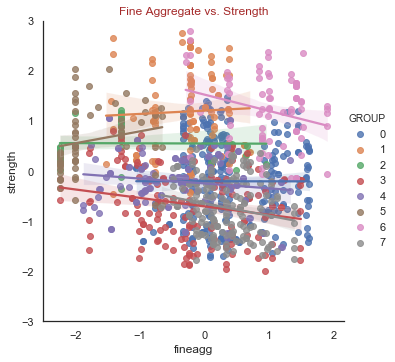

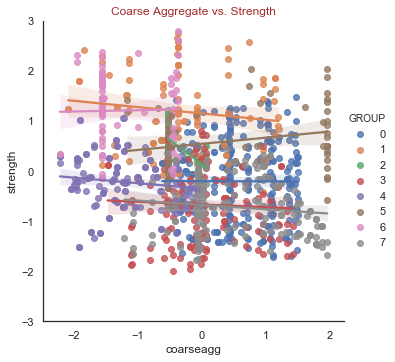

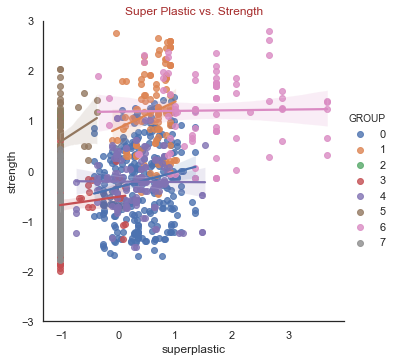

In [902]:
with sns.axes_style('white'):
    plot = sns.lmplot('cement', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Cement vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('ash', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Ash vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('water', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Water vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('slag', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Slag vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('age', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Age vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('fineagg', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Fine Aggregate vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('coarseagg', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Coarse Aggregate vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('superplastic', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Super Plastic vs. Strength', color = 'brown');

### Observations: 

<font color = blue>

- The above plots show the relation of target column with independent columns in cluster wise or group wise format. 

- For each independent variables, group of clusters were plotted with their respective best fit lines.
    
- The more horizontal a line is, the more week it is in predicting the target column. It means, a horizontal line will only take one value of target column and fix it. So the spread of all data points can't be captured by this line.
    
- We can observe from above plots that, in each of the cluster, data are far widen or spread away from the best fit line signifying too large variance in the cluster.

In [903]:
df_corrected.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398 -0.312970   
1 -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141  0.282260   
2 -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121  1.093371   
3 -0.145209  0.465044 -0.847144  0.488793     -1.039143  -0.526517 -1.292542   
4 -1.209776  1.269798 -0.847144  0.549700     -1.039143   0.958372 -0.959363   

        age  strength  
0 -0.279733 -0.355018  
1 -0.501465 -0.737108  
2 -0.279733 -0.395144  
3 -0.279733  0.600806  
4 -0.279733 -1.049727

In [904]:
X_scaled_corre = df_corrected.drop('strength', axis =1)
y_scaled_corre = df_corrected[['strength']]

In [905]:
# Split X and y into training and test set in 70:30 ratio

X_train_corre, X_test_corre, y_train_corre, y_test_corre = train_test_split(X_scaled_corre, y_scaled_corre, test_size=0.30, random_state=1)

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.d. Various Linear model building and testing with Train_Test_Split method
<a id='I2d'></a>

In [906]:
lr_model.fit(X_train_corre, y_train_corre)
ridge.fit(X_train_corre,y_train_corre)
lasso.fit(X_train_corre,y_train_corre)
dtr_model.fit(X_train_corre,y_train_corre)
clr.fit(X_train_corre,y_train_corre)
rfr = rfr.fit(X_train_corre,y_train_corre)
xgbr.fit(X_train_corre,y_train_corre)
gbr.fit(X_train_corre,y_train_corre)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=559, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training model Accuracy value for Linear Regressor Model: 56.50%
Testing Model Accuracy value for Linear Regressor Model: 60.35%


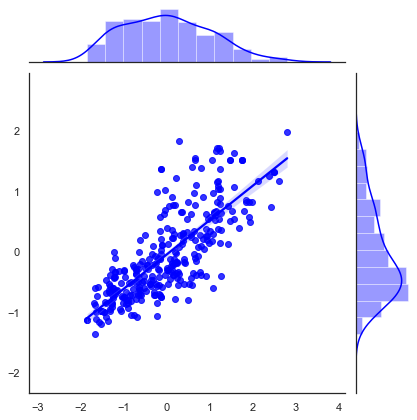

In [907]:
# Predicting the Test set results

print('Training model Accuracy value for Linear Regressor Model: {0:0.2f}%'.format((lr_model.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Linear Regressor Model: {0:0.2f}%'.format((lr_model.score(X_test_corre, y_test_corre))*100))

y_pred_lr_model = lr_model.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_lr_model), kind = 'reg', color = 'blue')

Training model Accuracy value for Ridge Regressor Model: 56.50%
Testing Model Accuracy value for Ridge Regressor Model: 60.34%


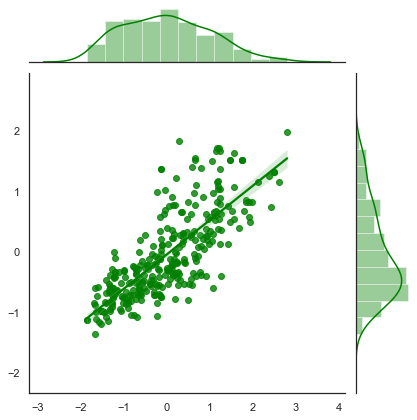

In [908]:
# Predicting the Test set results

print('Training model Accuracy value for Ridge Regressor Model: {0:0.2f}%'.format((ridge.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Ridge Regressor Model: {0:0.2f}%'.format((ridge.score(X_test_corre, y_test_corre))*100))

y_pred_ridge = ridge.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_ridge), kind = 'reg', color = 'green')

Training model Accuracy value for Lasso Regressor Model: 31.64%
Testing Model Accuracy value for Lasso Regressor Model: 30.02%


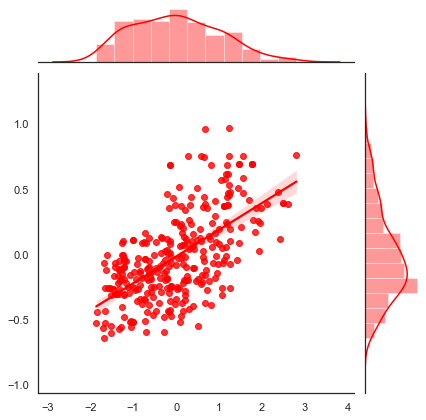

In [909]:
# Predicting the Test set results

print('Training model Accuracy value for Lasso Regressor Model: {0:0.2f}%'.format((lasso.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Lasso Regressor Model: {0:0.2f}%'.format((lasso.score(X_test_corre, y_test_corre))*100))

y_pred_lasso = lasso.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_lasso), kind = 'reg', color = 'red')

Training model Accuracy value for Decision Tree Regressor Model: 61.41%
Testing Model Accuracy value for Decision Tree Regressor Model: 52.92%


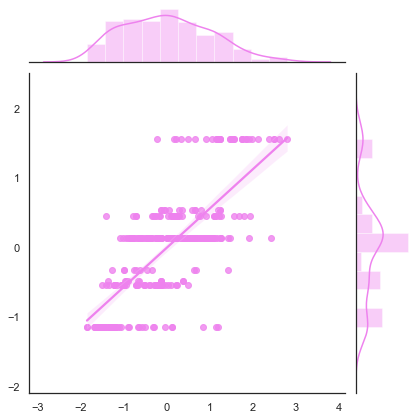

In [910]:
# Predicting the Test set results

print('Training model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_test_corre, y_test_corre))*100))

y_pred_dtr_model = dtr_model.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_dtr_model), kind = 'reg', color = 'violet')

Training model Accuracy value for Support vector Regressor Model: 79.47%
Testing Model Accuracy value for Support vector Regressor Model: 75.98%


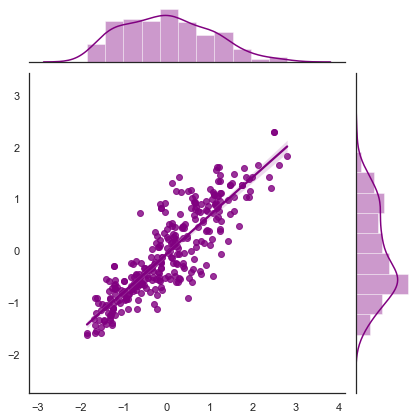

In [911]:
# Predicting the Test set results

print('Training model Accuracy value for Support vector Regressor Model: {0:0.2f}%'.format((clr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Support vector Regressor Model: {0:0.2f}%'.format((clr.score(X_test_corre, y_test_corre))*100))

y_pred_clr = clr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_clr), kind = 'reg', color = 'purple')

Training model Accuracy value for Random Forest Regressor Model: 96.18%
Testing Model Accuracy value for Random Forest Regressor Model: 82.79%


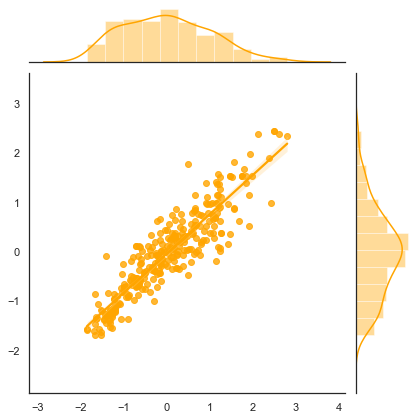

In [912]:
# Predicting the Test set results

print('Training model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_test_corre, y_test_corre))*100))

y_pred_rfr = rfr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_rfr), kind = 'reg', color = 'orange')

- For Random forest, the training score is coming around 96%, however, with test set, it gives a score of around 83%, which is a sign of overfitting of model.

Training model Accuracy value for XGBoost Regressor Model: 97.77%
Testing Model Accuracy value for XGBoost Regressor Model: 81.66%


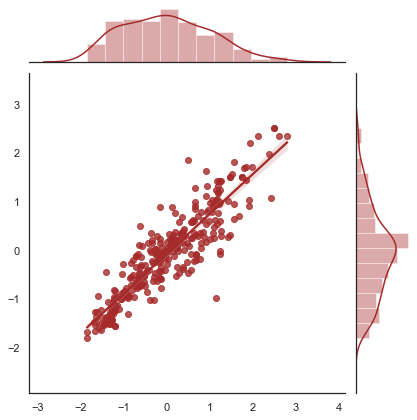

In [913]:
# Predicting the Test set results

print('Training model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_test_corre, y_test_corre))*100))

y_pred_xgbr = xgbr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_xgbr), kind = 'reg', color = 'brown')

- For XGBoost, the training score is coming around 97%, however, with test set, it gives a score of around 83%, which is a sign of overfitting of model.

Training model Accuracy value for Gradient Boost Regressor Model: 86.25%
Testing Model Accuracy value for Gradient Boost Regressor Model: 79.03%


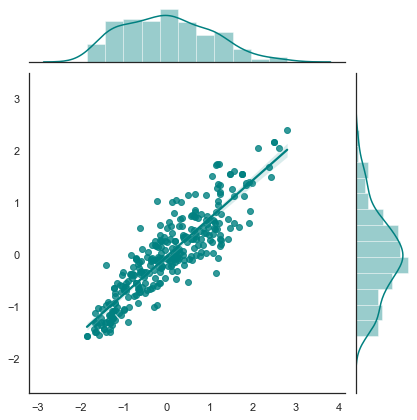

In [914]:
# Predicting the Test set results

print('Training model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_test_corre, y_test_corre))*100))

y_pred_gbr = gbr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_gbr), kind = 'reg', color = 'teal')

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.e. Various Linear model building and testing with KFold CV
<a id='I2e'></a>

In [915]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 235

kfold = KFold(n_splits = num_folds, random_state = seed)
result_lr = cross_val_score(lr_model, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_lr)
print('\n')
print('Model Score in itteration 2 for Linear Regression:%.3f%% (%.3f%%)'%(result_lr.mean()*100.0, result_lr.std()*100.0))

print('\n')
result_ridge = cross_val_score(ridge, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_ridge)
print('\n')
print('Model Score  in itteration 2 for Ridge:%.3f%% (%.3f%%)'%(result_ridge.mean()*100.0, result_ridge.std()*100.0))

print('\n')
result_lasso = cross_val_score(lasso, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_lasso)
print('\n')
print('Model Score  in itteration 2 for Lasso:%.3f%% (%.3f%%)'%(result_lasso.mean()*100.0, result_lasso.std()*100.0))

print('\n')
result_DTR = cross_val_score(dtr_model, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_DTR)
print('\n')
print('Model Score  in itteration 2 for Desission Tree Regressor:%.3f%% (%.3f%%)'%(result_DTR.mean()*100.0, result_DTR.std()*100.0))

print('\n')
result_clr = cross_val_score(clr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_clr)
print('\n')
print('Model Score  in itteration 2 for Support Vector Regressor:%.3f%% (%.3f%%)'%(result_clr.mean()*100.0, result_clr.std()*100.0))

print('\n')
result_rfr = cross_val_score(rfr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_rfr)
print('\n')
print('Model Score  in itteration 2 for Random Forest Regressor:%.3f%% (%.3f%%)'%(result_rfr.mean()*100.0, result_rfr.std()*100.0))

print('\n')
result_xgbr = cross_val_score(xgbr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_xgbr)
print('\n')
print('Model Score  in itteration 2 for XGBoost Regressor:%.3f%% (%.3f%%)'%(result_xgbr.mean()*100.0, result_xgbr.std()*100.0))

print('\n')
result_gbr = cross_val_score(gbr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_gbr)
print('\n')
print('Model Score  in itteration 2 for Gradient Boosting Regressor:%.3f%% (%.3f%%)'%(result_gbr.mean()*100.0, result_gbr.std()*100.0))

[0.52852254 0.633293   0.67389288 0.50734917 0.56775448 0.62661129
 0.47089744 0.52958011 0.48391658 0.53447629]


Model Score in itteration 2 for Linear Regression:55.563% (6.459%)


[0.52860245 0.63326292 0.67389387 0.50734495 0.5677508  0.62656857
 0.47091128 0.52953951 0.48400378 0.53448209]


Model Score  in itteration 2 for Ridge:55.564% (6.457%)


[0.3889476  0.27002654 0.38395527 0.30562276 0.29245903 0.32761022
 0.09291314 0.31574856 0.26160911 0.30383439]


Model Score  in itteration 2 for Lasso:29.427% (7.810%)


[0.54098708 0.46927227 0.58210943 0.40628945 0.61412656 0.62645254
 0.42595276 0.56212265 0.39750073 0.52776389]


Model Score  in itteration 2 for Desission Tree Regressor:51.526% (8.090%)


[0.68096118 0.76386653 0.84985263 0.65031512 0.70892012 0.79667431
 0.7750984  0.76038143 0.7551561  0.70178081]


Model Score  in itteration 2 for Support Vector Regressor:74.430% (5.612%)


[0.79172685 0.8255707  0.90379613 0.79932751 0.82762708 0.85412202
 0.84951345 0.81388

In [916]:
mse_i2_1 = np.mean((y_pred_lr_model - y_test_scaled)**2)
rmse_i2_1 = math.sqrt(mse_i2_1)

mse_i2_2 = np.mean((y_pred_ridge - y_test_scaled)**2)
rmse_i2_2 = math.sqrt(mse_i2_2)

mse_i2_3 = np.mean((y_pred_lasso.reshape(309,1) - y_test_p)**2)
rmse_i2_3 = math.sqrt(mse_i2_3)

mse_i2_4 = np.mean((y_pred_dtr_model.reshape(309,1) - y_test_scaled)**2)
rmse_i2_4 = math.sqrt(mse_i2_4)

mse_i2_5 = np.mean((y_pred_clr.reshape(309,1) - y_test_scaled)**2)
rmse_i2_5 = math.sqrt(mse_i2_5)

mse_i2_6 = np.mean((y_pred_rfr.reshape(309,1) -y_test_scaled)**2)
rmse_i2_6 = math.sqrt(mse_i2_6)

mse_i2_7 = np.mean((y_pred_xgbr.reshape(309,1) -y_test_scaled)**2)
rmse_i2_7 = math.sqrt(mse_i2_7)

mse_i2_8 = np.mean((y_pred_gbr.reshape(309,1) -y_test_scaled)**2)
rmse_i2_8 = math.sqrt(mse_i2_8)

In [917]:
result_itteration2 = pd.DataFrame({'Algorithm' : ['Linear Regression', 'Ridge', 'Lasso','Deision Tree', 'Support Vector', 
                                      'Random Forest', 'XGBoost', 'GradientBoost'],
                      'Model_score': [lr_model.score(X_test_corre, y_test_corre)*100.0, ridge.score(X_test_corre, y_test_corre)*100.0,
                                         lasso.score(X_test_corre, y_test_corre)*100.0, dtr_model.score(X_test_corre, y_test_corre)*100.0,
                                         clr.score(X_test_corre, y_test_corre)*100.0, rfr.score(X_test_corre, y_test_corre)*100.0,
                                         xgbr.score(X_test_corre, y_test_corre)*100.0, gbr.score(X_test_corre, y_test_corre)*100.0],
                    
                    'Root Mean Square Error' : [rmse_i2_1, rmse_i2_2, rmse_i2_3, 
                                           rmse_i2_4, rmse_i2_5, rmse_i2_6, 
                                           rmse_i2_7, rmse_i2_8],
                                   
                      'Cross_val_score' : [result_lr.mean()*100.0, result_ridge.mean()*100.0, result_lasso.mean()*100.0, 
                                           result_DTR.mean()*100.0, result_clr.mean()*100.0, result_rfr.mean()*100.0, 
                                           result_xgbr.mean()*100.0, result_gbr.mean()*100.0],
                       
                      'Std_Dev':[result_lr.std()*100.0, result_ridge.std()*100.0, result_lasso.std()*100.0,
                                 result_DTR.std()*100.0, result_clr.std()*100.0, result_rfr.std()*100.0, 
                                 result_xgbr.std()*100.0, result_gbr.std()*100.0]})
result_itteration2

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    60.347237                0.670540        55.562938   
1              Ridge    60.336035                0.670653        55.563602   
2              Lasso    30.019455                0.948238        29.427266   
3       Deision Tree    52.918005                0.688565        51.525774   
4     Support Vector    75.984861                0.518199        74.430066   
5      Random Forest    82.793223                0.414309        83.873459   
6            XGBoost    81.663114                0.411717        83.776223   
7      GradientBoost    79.034399                0.466321        79.741688   

    Std_Dev  
0  6.458897  
1  6.456769  
2  7.810435  
3  8.090367  
4  5.612207  
5  3.415621  
6  3.757386  
7  3.312904

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.f. Observations on Model Score
<a id='I2f'></a>

<font color = blue>

- In Linear Regression Analysis, Cost function is the Root mean Square error, and we need to minimize it. The model which gives minimum RMSE value is the suitable model to go with. So here, Random Forest has the lowest RMSE value, and can be chosen for further analysis. However, model score also plays an important role to decide the accurate model. 
    
    
- It can be observed that, after addressing outliers for all the features by imputing the respective median value of each column, the score of the models has decreased.   

- However, among all models Radom Forest Repressor has maximum score with train_test_split method, 

- and XGBoost model has also maximum cross validation score with a standard deviation of 3.316.

- We will try to explore more about the scores and enhance the model performance by creating some composite features and again addressing the outliers present in the features with different number of clusters.


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.2 em;color:Purple;"> 7. Iteration -3: Composite Feature Creation, Generation of Cluster, Outlier Detection & Treatment, Model Building & Testing
<a id='I3'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">    7.a. Composite Feature Creation
<a id='I3a'></a>

In [918]:
df_attr = df.iloc[:, 0:10]
df_attr['cor_fine_agg'] = df_attr['coarseagg'] + df_attr['fineagg']
df_attr['ash_slag'] = df_attr['ash'] + df_attr['slag']

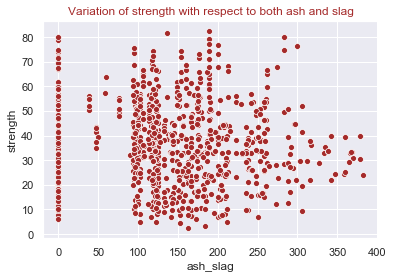

In [919]:
sns.scatterplot(df_attr.ash_slag, df_attr.strength,color = 'brown');
plt.title('Variation of strength with respect to both ash and slag', color = 'brown');

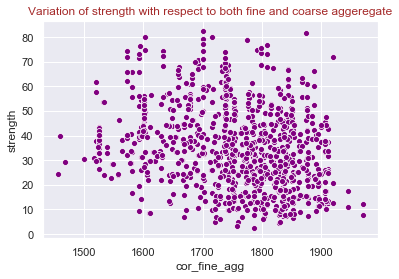

In [920]:
sns.scatterplot(df_attr.cor_fine_agg, df_attr.strength,color = 'purple');
plt.title('Variation of strength with respect to both fine and coarse aggeregate', color = 'brown');

In [921]:
corr_matrix = df_attr.corr()
corr_matrix['strength'].sort_values(ascending = False)

strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
slag            0.134829
ash_slag        0.054507
ash            -0.105755
coarseagg      -0.164935
fineagg        -0.167241
cor_fine_agg   -0.259130
water          -0.289633
Name: strength, dtype: float64

In [922]:
df_attr = df_attr.apply(zscore)

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   7.b. Generation of Cluster and cluster error determination
<a id='I3b'></a>

In [923]:
cluster_range = range (3,12)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans (num_clusters, n_init = 5)
    clusters.fit(df_attr)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df_attr = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})
clusters_df_attr[0:30]

num_clusters  cluster_errors
0             3     7794.249536
1             4     6654.025773
2             5     5824.381927
3             6     5219.969152
4             7     4892.345033
5             8     4637.918717
6             9     4344.915462
7            10     4132.931803
8            11     3883.332358

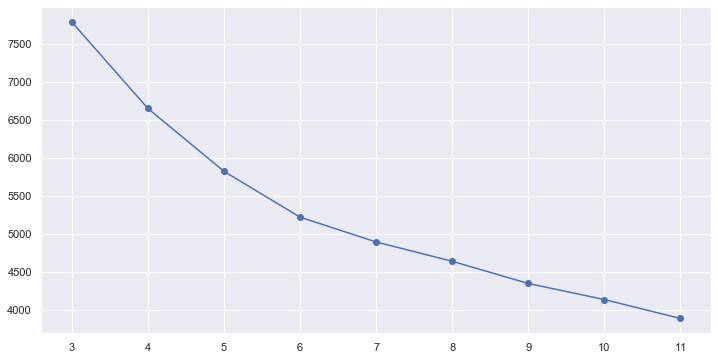

In [924]:
# Elbow Plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df_attr.num_clusters, clusters_df_attr.cluster_errors, marker = 'o');

- The elbow plot confirms our visual analysis that there are likely 7 or 8 clusters.
- Let us start with 6 clusters

In [925]:
cluster = KMeans(n_clusters = 6, random_state = 2535)
cluster.fit(df_attr)

prediction = cluster.predict(df_attr)
# Creating a new column 'GROUP' which will hold the cluster id of each record
df_attr['GROUP'] = prediction

# Creating a mirror copy for later re-use instead of building repeatedly 
df_attr_copy = df_attr.copy(deep = True)

- let's see the centroids of these clusters

In [926]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.64389474, -0.85389926, -0.83755442,  0.40643963, -0.99899994,
         0.64947697,  0.06576272, -0.1407015 , -0.45837557,  0.55091505,
        -1.42597624],
       [-0.31663861,  0.21495013,  1.10546986,  0.53859061,  0.47538935,
        -1.23845118, -0.44296501, -0.29389134, -0.09389414, -1.30201389,
         1.00042557],
       [ 1.04640316,  0.46704713, -0.55724134, -0.99813053,  1.1358355 ,
        -0.64014308,  0.2697471 , -0.17801788,  1.2016532 , -0.27802996,
         0.05192725],
       [-0.81098426,  1.39463645, -0.79894863,  0.51984884, -0.68064463,
        -0.02681648, -0.23385544, -0.25068167, -0.52813078, -0.20580468,
         0.77528833],
       [ 0.70615294, -0.08941103, -0.84714393,  1.72076737, -1.03914281,
        -0.16825719, -1.42174666,  2.90474577,  0.59141048, -1.2552215 ,
        -0.69384712],
       [-0.59939214, -0.64372482,  1.07069016, -0.57715316,  0.37883586,
         0.58215052,  0.4333687 , -0.12217789, -0.20358278,  0.7903404 ,
         0.145

- Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the centroids and the data in the cluster into box plots.

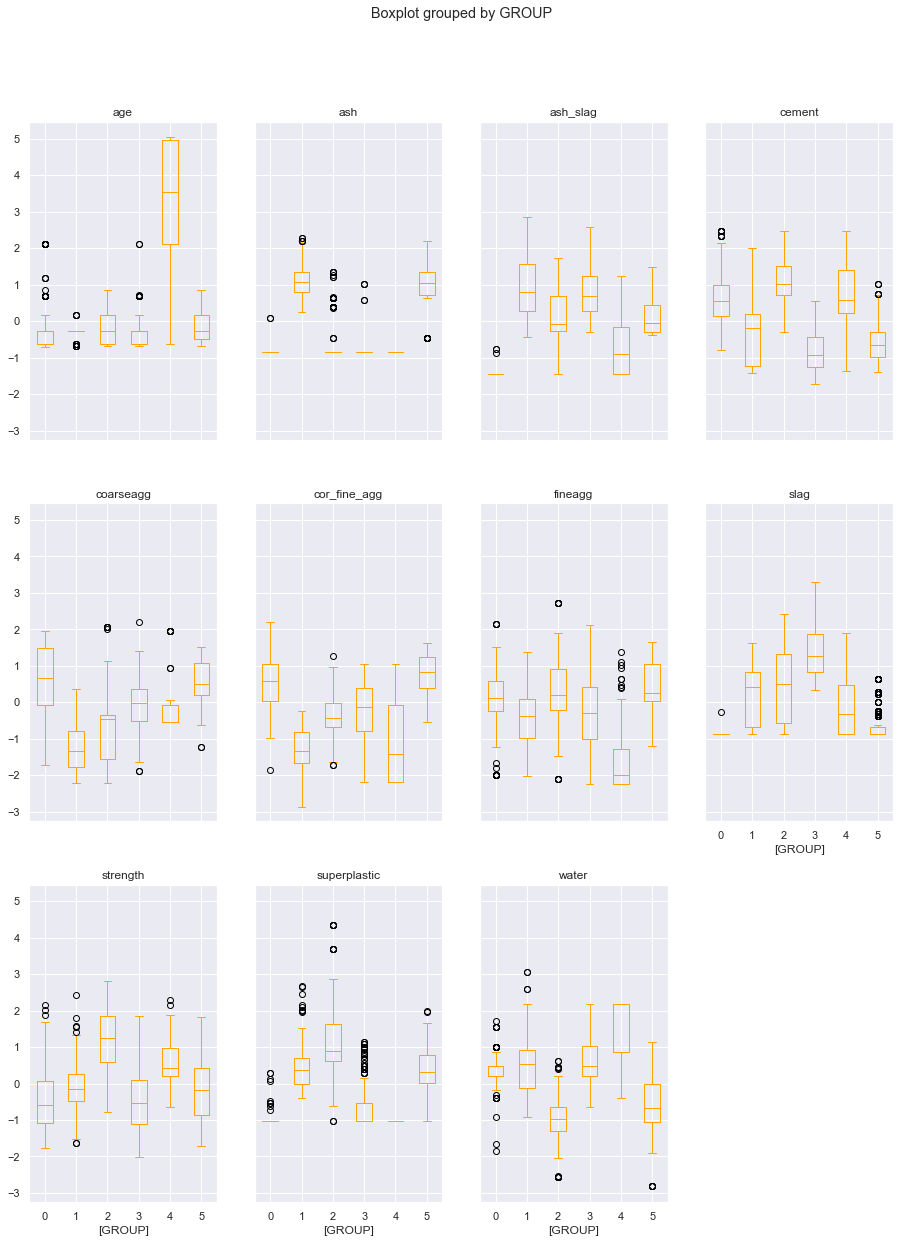

In [927]:
df_attr.boxplot(by = 'GROUP', layout = (3,4), figsize = (15,20), color = 'orange');

### Observations:

<font color = Blue>


- Many outliers can be seen on each dimension (indicated by the black circle)
- Spread of data on each dimension (indicated by the whiskers is long....due to the outliers)
- If the outliers are addressed, the clusters will overlap much


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">    7.c. Detection of Outliers and Treatment
<a id='I3c'></a>

In [928]:
# Addressing the outliers at group level

def replace(group):
    median, std = group.median(), group.std()  # Get the median and the standard deviation of every group
    outliers = (group - median).abs()> 2*std  # Subtract median from every member of each group. Take absolute values > 2 std. dev
    group[outliers] = group.median()
    return group

df_corrected = (df_attr.groupby('GROUP').transform(replace))
concat_data = df_corrected.join(pd.DataFrame(df_attr['GROUP']))

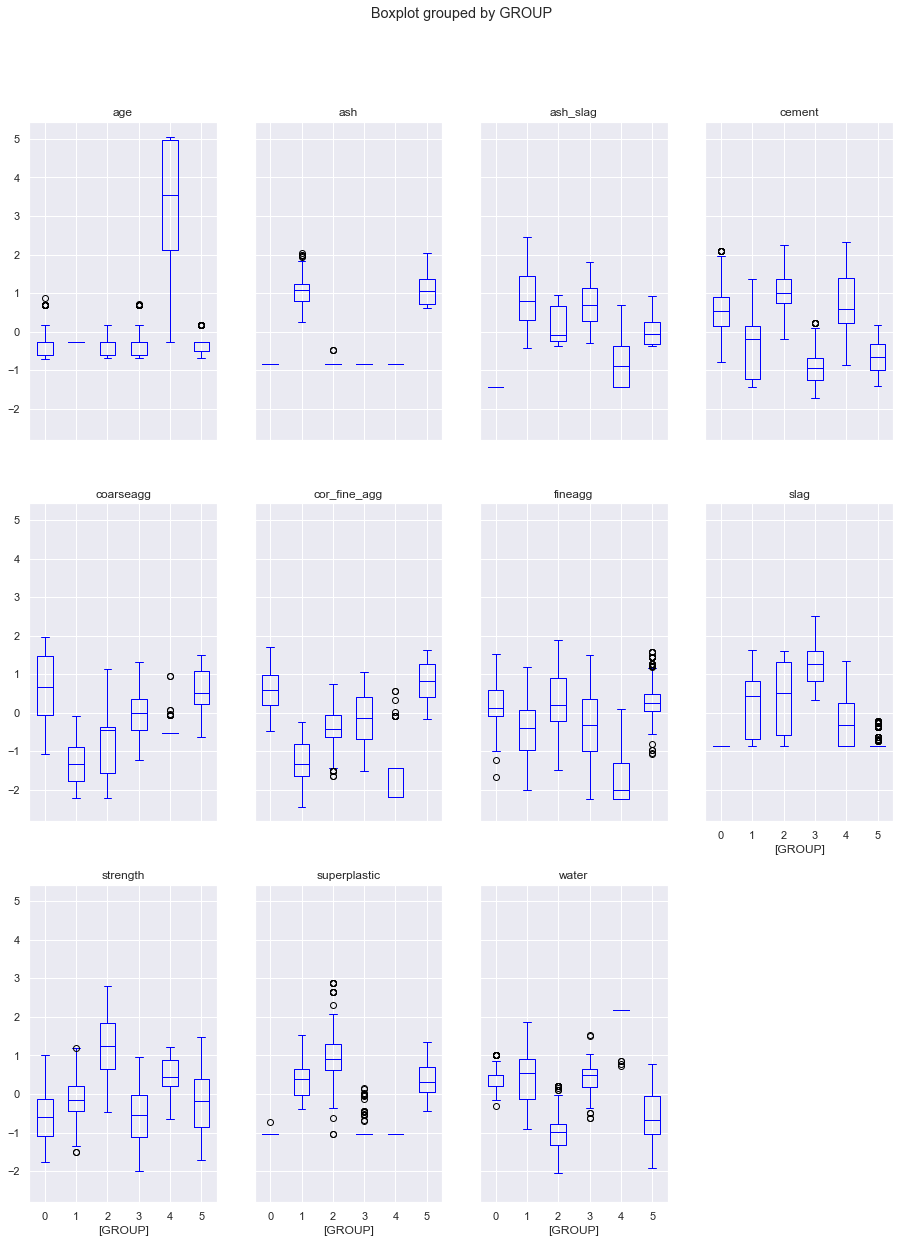

In [929]:
concat_data.boxplot(by = 'GROUP', layout = (3,4), figsize = (15,20), color = 'blue');

### Observations:

<font color = blue>

- NOTE: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.

- By replacing outliers, forcefully we created some new outliers by making the boundary much tighter. 


### Let us analyze the target column vs other columns group wise 

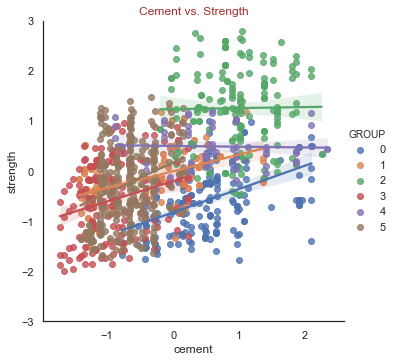

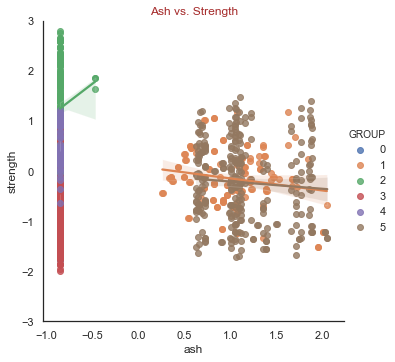

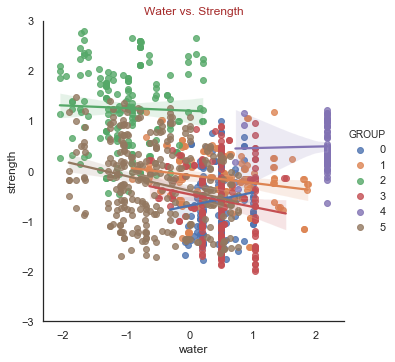

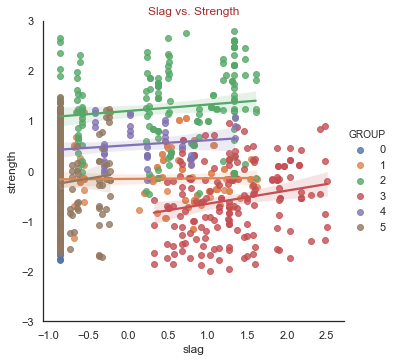

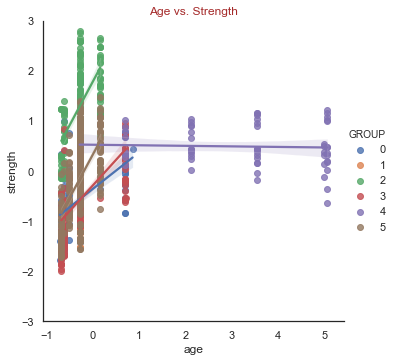

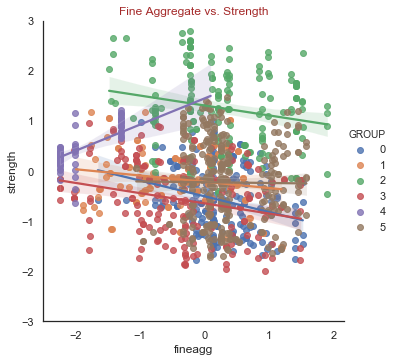

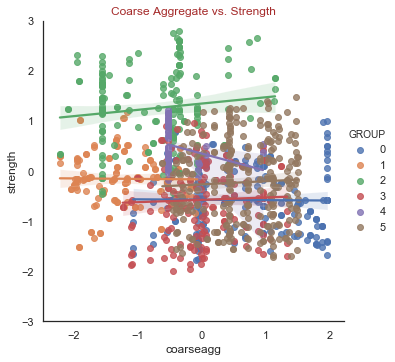

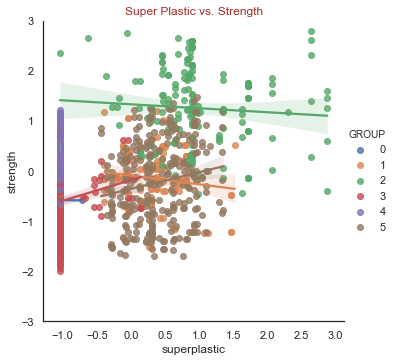

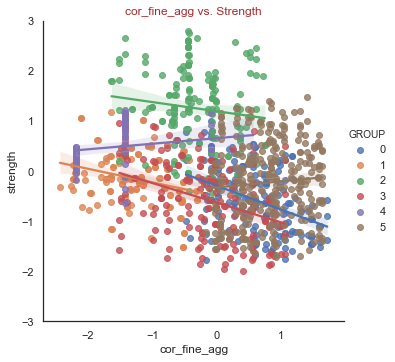

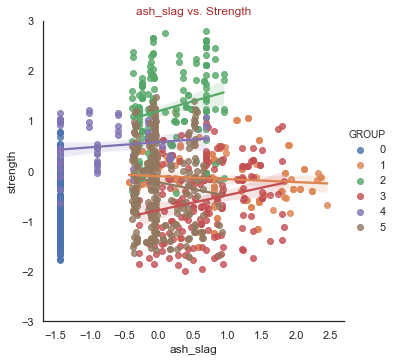

In [930]:
with sns.axes_style('white'):
    plot = sns.lmplot('cement', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Cement vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('ash', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Ash vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('water', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Water vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('slag', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Slag vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('age', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Age vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('fineagg', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Fine Aggregate vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('coarseagg', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Coarse Aggregate vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('superplastic', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('Super Plastic vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('cor_fine_agg', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('cor_fine_agg vs. Strength', color = 'brown');


with sns.axes_style('white'):
    plot = sns.lmplot('ash_slag', 'strength', data = concat_data, hue = 'GROUP')
plot.set(ylim = (-3,3));
plt.title('ash_slag vs. Strength', color = 'brown');

### Observations: 

<font color = blue>
    
- The above plots show the relation of target column with independent columns in a cluster wise or group wise format. 

- Here, we have made 6 clusters based upon the elbow plot.

- And, for each independent variables, group of clusters were plotted with their respective best fit lines.
    
- The more horizontal a line is, the more week it is in predicting the target column. It means, a horizontal line will only take one value of target column and fix it. So the spread of all data points can't be captured by this line.
    
- We can observe from above plots that, in each of the cluster, data are far widen or spread away from the best fit line signifying too large variance in the cluster.


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">    7.d. Modeling Building & Testing using Train_Test_Split method
<a id='I3d'></a>

In [931]:
df_corrected.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398 -0.312970   
1 -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141  0.282260   
2 -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121  1.093371   
3 -0.145209  0.465044 -0.847144  0.488793     -1.039143  -0.526517 -1.292542   
4 -1.209776  1.269798 -0.847144  0.549700     -1.039143   0.958372 -0.959363   

        age  strength  cor_fine_agg  ash_slag  
0 -0.279733 -0.355018     -0.258923  0.940642  
1 -0.501465 -0.737108      1.289709  0.430617  
2 -0.279733 -0.395144      0.707613 -0.363006  
3 -0.279733  0.600806     -1.428057 -0.157875  
4 -0.279733 -1.049727     -0.023713  0.620055

In [932]:
X_scaled_corre = df_corrected.drop('strength', axis =1)
y_scaled_corre = df_corrected[['strength']]

In [933]:
# Split X and y into training and test set in 70:30 ratio

X_train_corre, X_test_corre, y_train_corre, y_test_corre = train_test_split(X_scaled_corre, y_scaled_corre, test_size=0.30, random_state=1)

In [934]:
lr_model.fit(X_train_corre, y_train_corre)
ridge.fit(X_train_corre,y_train_corre)
lasso.fit(X_train_corre,y_train_corre)
dtr_model.fit(X_train_corre,y_train_corre)
clr.fit(X_train_corre,y_train_corre)
rfr = rfr.fit(X_train_corre,y_train_corre)
xgbr.fit(X_train_corre,y_train_corre)
gbr.fit(X_train_corre,y_train_corre)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=559, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training model Accuracy value for Linear Regressor Model: 54.35%
Testing Model Accuracy value for Linear Regressor Model: 56.61%


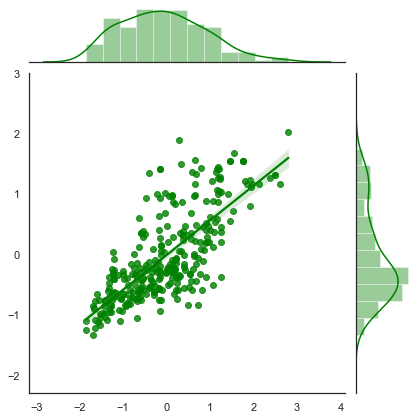

In [935]:
# Predicting the Test set results

print('Training model Accuracy value for Linear Regressor Model: {0:0.2f}%'.format((lr_model.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Linear Regressor Model: {0:0.2f}%'.format((lr_model.score(X_test_corre, y_test_corre))*100))

y_pred_lr_model = lr_model.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_lr_model), kind = 'reg', color = 'green')

Training model Accuracy value for Ridge Regressor Model: 54.35%
Testing Model Accuracy value for Ridge Regressor Model: 56.61%


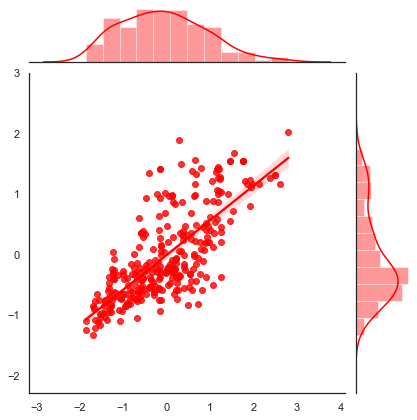

In [936]:
# Predicting the Test set results

print('Training model Accuracy value for Ridge Regressor Model: {0:0.2f}%'.format((ridge.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Ridge Regressor Model: {0:0.2f}%'.format((ridge.score(X_test_corre, y_test_corre))*100))

y_pred_ridge = ridge.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_ridge), kind = 'reg', color = 'red')

Training model Accuracy value for Lasso Regressor Model: 27.37%
Testing Model Accuracy value for Lasso Regressor Model: 25.88%


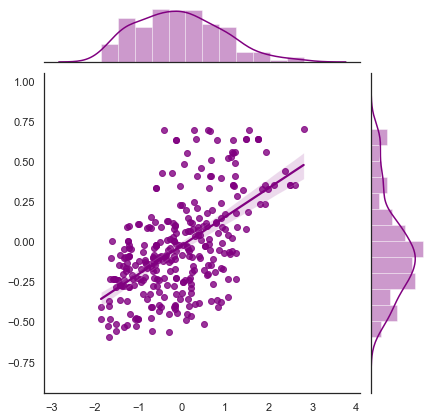

In [937]:
# Predicting the Test set results

print('Training model Accuracy value for Lasso Regressor Model: {0:0.2f}%'.format((lasso.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Lasso Regressor Model: {0:0.2f}%'.format((lasso.score(X_test_corre, y_test_corre))*100))

y_pred_lasso = lasso.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_lasso), kind = 'reg', color = 'purple')

Training model Accuracy value for Decision Tree Regressor Model: 62.21%
Testing Model Accuracy value for Decision Tree Regressor Model: 54.50%


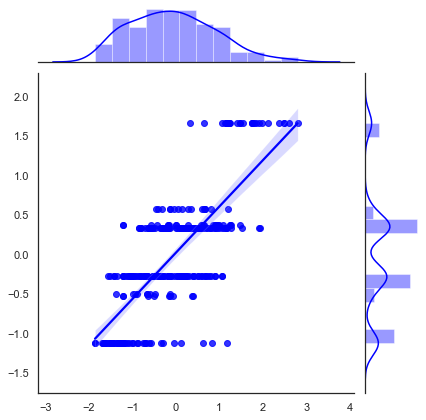

In [938]:
# Predicting the Test set results

print('Training model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Decision Tree Regressor Model: {0:0.2f}%'.format((dtr_model.score(X_test_corre, y_test_corre))*100))

y_pred_dtr_model = dtr_model.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_dtr_model), kind = 'reg', color = 'blue')

Training model Accuracy value for Support vector Regressor Model: 79.75%
Testing Model Accuracy value for Support vector Regressor Model: 72.14%


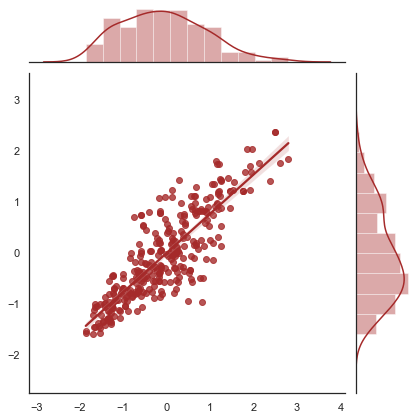

In [939]:
# Predicting the Test set results

print('Training model Accuracy value for Support vector Regressor Model: {0:0.2f}%'.format((clr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Support vector Regressor Model: {0:0.2f}%'.format((clr.score(X_test_corre, y_test_corre))*100))

y_pred_clr = clr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_clr), kind = 'reg', color = 'brown')

Training model Accuracy value for Random Forest Regressor Model: 96.06%
Testing Model Accuracy value for Random Forest Regressor Model: 83.62%


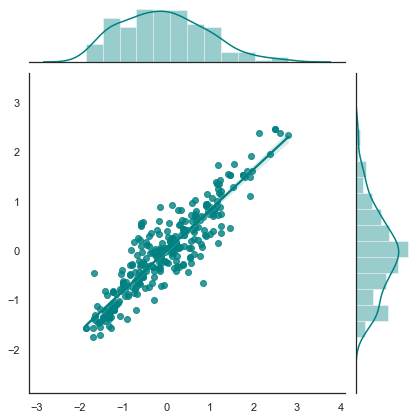

In [940]:
# Predicting the Test set results

print('Training model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Random Forest Regressor Model: {0:0.2f}%'.format((rfr.score(X_test_corre, y_test_corre))*100))

y_pred_rfr = rfr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_rfr), kind = 'reg', color = 'teal')

- For Random forest, the training score is coming around 96%, however, with test set, it gives a score of around 85%, which is a sign of overfitting of model.

Training model Accuracy value for XGBoost Regressor Model: 97.54%
Testing Model Accuracy value for XGBoost Regressor Model: 82.23%


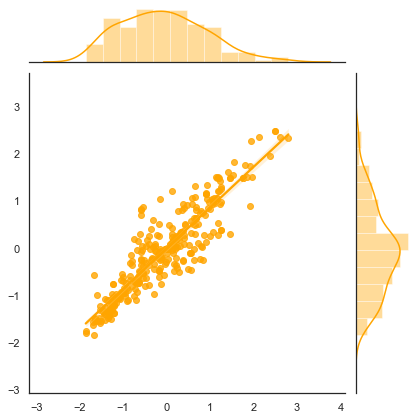

In [941]:
# Predicting the Test set results

print('Training model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for XGBoost Regressor Model: {0:0.2f}%'.format((xgbr.score(X_test_corre, y_test_corre))*100))

y_pred_xgbr = xgbr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_xgbr), kind = 'reg', color = 'orange')

- For XGBoost, the training score is coming around 97%, however, with test set, it gives a score of around 82%, which is a sign of overfitting of model.

Training model Accuracy value for Gradient Boost Regressor Model: 86.63%
Testing Model Accuracy value for Gradient Boost Regressor Model: 79.51%


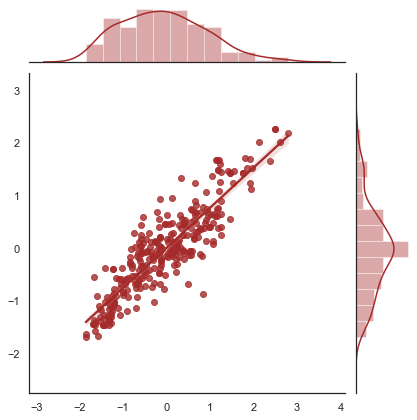

In [942]:
# Predicting the Test set results

print('Training model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_train_corre,y_train_corre))*100))

print('Testing Model Accuracy value for Gradient Boost Regressor Model: {0:0.2f}%'.format((gbr.score(X_test_corre, y_test_corre))*100))

y_pred_gbr = gbr.predict(X_test_corre)
sns.set(style = 'darkgrid', color_codes = True)

with sns.axes_style('white'):
    sns.jointplot(x = y_test_corre, y = pd.DataFrame(y_pred_gbr), kind = 'reg', color = 'brown')

In [943]:
mse_i3_1 = np.mean((y_pred_lr_model - y_test_scaled)**2)
rmse_i3_1 = math.sqrt(mse_i3_1)

mse_i3_2 = np.mean((y_pred_ridge - y_test_scaled)**2)
rmse_i3_2 = math.sqrt(mse_i3_2)

mse_i3_3 = np.mean((y_pred_lasso.reshape(309,1) - y_test_p)**2)
rmse_i3_3 = math.sqrt(mse_i3_3)

mse_i3_4 = np.mean((y_pred_dtr_model.reshape(309,1) - y_test_scaled)**2)
rmse_i3_4 = math.sqrt(mse_i3_4)

mse_i3_5 = np.mean((y_pred_clr.reshape(309,1) - y_test_scaled)**2)
rmse_i3_5 = math.sqrt(mse_i3_5)

mse_i3_6 = np.mean((y_pred_rfr.reshape(309,1) -y_test_scaled)**2)
rmse_i3_6 = math.sqrt(mse_i3_6)

mse_i3_7 = np.mean((y_pred_xgbr.reshape(309,1) -y_test_scaled)**2)
rmse_i3_7 = math.sqrt(mse_i3_7)

mse_i3_8 = np.mean((y_pred_gbr.reshape(309,1) -y_test_scaled)**2)
rmse_i3_8 = math.sqrt(mse_i3_8)

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">  7.e. Modeling Building & Testing using KFold CV
<a id='I3e'></a>

In [944]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 235

kfold = KFold(n_splits = num_folds, random_state = seed)
result_lr = cross_val_score(lr_model, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_lr)
print('\n')
print('Model Score in itteration 2 for Linear Regression:%.3f%% (%.3f%%)'%(result_lr.mean()*100.0, result_lr.std()*100.0))

print('\n')
result_ridge = cross_val_score(ridge, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_ridge)
print('\n')
print('Model Score  in itteration 2 for Ridge:%.3f%% (%.3f%%)'%(result_ridge.mean()*100.0, result_ridge.std()*100.0))

print('\n')
result_lasso = cross_val_score(lasso, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_lasso)
print('\n')
print('Model Score  in itteration 2 for Lasso:%.3f%% (%.3f%%)'%(result_lasso.mean()*100.0, result_lasso.std()*100.0))

print('\n')
result_DTR = cross_val_score(dtr_model, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_DTR)
print('\n')
print('Model Score  in itteration 2 for Desission Tree Regressor:%.3f%% (%.3f%%)'%(result_DTR.mean()*100.0, result_DTR.std()*100.0))

print('\n')
result_clr = cross_val_score(clr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_clr)
print('\n')
print('Model Score  in itteration 2 for Support Vector Regressor:%.3f%% (%.3f%%)'%(result_clr.mean()*100.0, result_clr.std()*100.0))

print('\n')
result_rfr = cross_val_score(rfr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_rfr)
print('\n')
print('Model Score  in itteration 2 for Random Forest Regressor:%.3f%% (%.3f%%)'%(result_rfr.mean()*100.0, result_rfr.std()*100.0))

print('\n')
result_xgbr = cross_val_score(xgbr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_xgbr)
print('\n')
print('Model Score  in itteration 2 for XGBoost Regressor:%.3f%% (%.3f%%)'%(result_xgbr.mean()*100.0, result_xgbr.std()*100.0))

print('\n')
result_gbr = cross_val_score(gbr, X_scaled_corre, y_scaled_corre, cv = kfold)
print(result_gbr)
print('\n')
print('Model Score  in itteration 2 for Gradient Boosting Regressor:%.3f%% (%.3f%%)'%(result_gbr.mean()*100.0, result_gbr.std()*100.0))

[0.40556568 0.6336184  0.61370546 0.49849469 0.51109633 0.63127848
 0.44755984 0.48874452 0.47407289 0.52263903]


Model Score in itteration 2 for Linear Regression:52.268% (7.482%)


[0.40569166 0.63357086 0.61371101 0.49852536 0.51105895 0.63126003
 0.44752763 0.48881376 0.47415038 0.5226717 ]


Model Score  in itteration 2 for Ridge:52.270% (7.478%)


[0.28017746 0.24116302 0.30737279 0.23391971 0.2387905  0.29450529
 0.03882279 0.27282197 0.2779722  0.26179282]


Model Score  in itteration 2 for Lasso:24.473% (7.239%)


[0.54229289 0.5924053  0.53367243 0.46407772 0.60991691 0.62430938
 0.55914426 0.62933133 0.51892832 0.58936896]


Model Score  in itteration 2 for Desission Tree Regressor:56.634% (4.984%)


[0.55875337 0.81256267 0.8249003  0.67933844 0.70845101 0.81285916
 0.74896874 0.78628104 0.71528369 0.68163555]


Model Score  in itteration 2 for Support Vector Regressor:73.290% (7.813%)


[0.76497507 0.87040402 0.87132334 0.82384879 0.85258661 0.89485503
 0.78597613 0.84227

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">    7.f. Observations on Model Score 
<a id='I3f'></a>

In [945]:
result_itteration3 = pd.DataFrame({'Algorithm' : ['Linear Regression', 'Ridge', 'Lasso','Deision Tree', 'Support Vector', 
                                      'Random Forest', 'XGBoost', 'GradientBoost'],
                      'Model_score': [lr_model.score(X_test_corre, y_test_corre)*100.0, ridge.score(X_test_corre, y_test_corre)*100.0,
                                         lasso.score(X_test_corre, y_test_corre)*100.0, dtr_model.score(X_test_corre, y_test_corre)*100.0,
                                         clr.score(X_test_corre, y_test_corre)*100.0, rfr.score(X_test_corre, y_test_corre)*100.0,
                                         xgbr.score(X_test_corre, y_test_corre)*100.0, gbr.score(X_test_corre, y_test_corre)*100.0],
                                   
                     'Root Mean Square Error' : [rmse_i3_1, rmse_i3_2, rmse_i3_3, 
                                           rmse_i3_4, rmse_i3_5, rmse_i3_6, 
                                           rmse_i3_7, rmse_i3_8],
                       
                      'Cross_val_score' : [result_lr.mean()*100.0, result_ridge.mean()*100.0, result_lasso.mean()*100.0, 
                                           result_DTR.mean()*100.0, result_clr.mean()*100.0, result_rfr.mean()*100.0, 
                                           result_xgbr.mean()*100.0, result_gbr.mean()*100.0],
                       
                      'Std_Dev':[result_lr.std()*100.0, result_ridge.std()*100.0, result_lasso.std()*100.0,
                                 result_DTR.std()*100.0, result_clr.std()*100.0, result_rfr.std()*100.0, 
                                 result_xgbr.std()*100.0, result_gbr.std()*100.0]})
result_itteration3

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    56.613860                0.698418        52.267753   
1              Ridge    56.608356                0.698479        52.269813   
2              Lasso    25.878016                0.944048        24.473386   
3       Deision Tree    54.498610                0.704209        56.634475   
4     Support Vector    72.140254                0.553305        73.290340   
5      Random Forest    83.620314                0.465409        84.352936   
6            XGBoost    82.231836                0.470004        83.526744   
7      GradientBoost    79.507972                0.495998        79.433124   

    Std_Dev  
0  7.481897  
1  7.478485  
2  7.239213  
3  4.983943  
4  7.813029  
5  3.886086  
6  4.072049  
7  3.367108

### Observations:

<font color = blue>
    
- In Linear Regression Analysis, Cost function is the Root mean Square error, and we need to minimize it. The model which gives minimum RMSE value is the suitable model to go with. So here, Random Forest has the lowest RMSE value, and can be chosen for further analysis. However, model score also plays an important role to decide the accurate model. 
 
- It can be observed that, after generating two composite features and addressing outliers for all the features by imputing the respective median value of each column, the score of the models has not increased, rather it got affected further.   

- However, among all models Random Forest Repressor has maximum score with train_test_split method, 

- And it has also maximum cross validation score with a standard deviation of 3.886.



## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;">8. Iteration -4: Model Tuning using GridSearch CV and RandomSearch CV
<a id='I4'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   8.a. Best Model suitbale for this Project
<a id='I4a'></a>



### Observations:

<font color = blue>

- Based upon the RMSE value, Model prediction score and CV score, out of non-regularised model, regularised model and other regression model, only Random Forest Repressor and XGBoost repressor gave a decent result. And among all three iterations, we got a good score in iteration 1.
    
- Thus we will go with the result of 1st iteration and the processes we have followed up for this.

- Now we will further try to explore more on the model performance by considering only two best models whose mean scores are nearly equal and also highest among all.

- In this iteration, we will tuning the model by following feature engineering process. 

- We will take XGBoost and Random Forest Regression models for model tuning and will check the score.
    
- Model tuning, here we are going to use Grid Search CV and Randomized Search CV.


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   8.b. Model Tuning using Grid Search CV
<a id='I4b'></a>

<font color = copper>

### Random Forest Regressor:



In [946]:
from sklearn.model_selection import GridSearchCV

parameters_rfr = {'bootstrap':[True],
             'max_depth': [10,20,30,40,50],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1,2,4,8],
             'n_estimators': [100]}

clf = GridSearchCV(RandomForestRegressor(), parameters_rfr, cv = 5, verbose = 2, n_jobs=4)
clf.fit(X_scaled, y_scaled)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  1.9min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [965]:
rfr_gdcv = RandomForestRegressor(bootstrap=True,
max_depth=30,
max_features= 'auto',
min_samples_leaf= 1,
n_estimators=100)

rfr_gdcv.fit(X_train_scaled, y_train_scaled)

rfr_gdcv_score = cross_val_score(rfr_gdcv, X_test_scaled, y_test_scaled, cv=5)

print('Model Score in itteration 4 for Random Forest Regressor using GridSearch CV:%.3f%% (%.3f%%)'%(rfr_gdcv_score.mean()*100.0, rfr_gdcv_score.std()*100.0))

Model Score in itteration 4 for Random Forest Regressor using GridSearch CV:84.428% (3.314%)


<font color = copper>

### XGBoost Regressor:



In [948]:
parameters_xgbr = {'gamma':[0.1,0.2,0.3,0.4],
             'max_depth':[3,None],
             'min_child_weight':[0,3,4,9],
              'num_parallel_tree': [0,4,6,9],
              'colsample_bylevel': [0,3,4,8],
             'colsample_bynode': [0,3,7,9],
             'colsample_bytree': [0,2,4,6],
                   'n_estimators':[50,80,100]}


gscv_xgbr = GridSearchCV(xgbr, parameters_xgbr, cv = 5, verbose = 2, n_jobs=4)
gscv_xgbr.fit(X_train_scaled, y_train_scaled)

gscv_xgbr.best_params_

Fitting 5 folds for each of 24576 candidates, totalling 122880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   50.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 2128 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 6984 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 12496 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 18648 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 25456 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 32904 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 41008 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 49752 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 59152 tasks      | elapsed: 

{'colsample_bylevel': 0,
 'colsample_bynode': 0,
 'colsample_bytree': 0,
 'gamma': 0.1,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 100,
 'num_parallel_tree': 9}

In [949]:
xgbr_gscv = xgboost.XGBRegressor(colsample_bylevel=0,
 colsample_bynode= 0,
 colsample_bytree= 0,
 gamma= 0.1,
 max_depth= 3,
 min_child_weight= 0,
 n_estimators= 100,
 num_parallel_tree= 9)

xgbr_gscv.fit(X_train_scaled, y_train_scaled)

xgbr_gscv_score = cross_val_score(xgbr_gscv, X_test_scaled, y_test_scaled, cv=5)

print('Model Score  in itteration 4 for XGBoost Regressor using RandomSearch CV:%.3f%% (%.3f%%)'%(xgbr_gscv_score.mean()*100.0, xgbr_gscv_score.std()*100.0))

Model Score  in itteration 4 for XGBoost Regressor using RandomSearch CV:81.877% (2.613%)


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   8.c. Model Tuning using Randomized Search CV
<a id='I4c'></a>

<font color = copper>

### Random Forest Regressor:



In [950]:
parameter_rfr_rcv = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              }

In [951]:
# run randomized search
from sklearn.model_selection import RandomizedSearchCV
samples = 10    # number of random samples
rscv =  RandomizedSearchCV(rfr, param_distributions =parameter_rfr_rcv, n_iter=samples)


In [952]:
rscv.fit(X_train_scaled, y_train_scaled)
print(rscv.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [953]:
rfr_rscv = RandomForestRegressor(bootstrap= False, max_depth= None, 
                                 max_features= 2, min_samples_leaf= 1, 
                                 min_samples_split= 4)

rfr_rscv.fit(X_train_scaled, y_train_scaled)

rfr_rscv_score = cross_val_score(rfr_rscv, X_test_scaled, y_test_scaled, cv=5)

print('Model Score  in itteration 4 for Random Forest Regressor using RandomSearch CV:%.3f%% (%.3f%%)'%(rfr_rscv_score.mean()*100.0, rfr_rscv_score.std()*100.0))

Model Score  in itteration 4 for Random Forest Regressor using RandomSearch CV:82.035% (4.088%)


<font color = copper>

### XGBoost Regressor:



In [954]:
parameters_xgbr_rscv = {'gamma':[0.1],
             'max_depth':sp_randint(1, 11),
             'min_child_weight': sp_randint(1, 11),
              'num_parallel_tree': sp_randint(0, 2),
              'colsample_bylevel': sp_randint(0, 2),
              'colsample_bynode': sp_randint(0, 2),
              'colsample_bytree': sp_randint(0, 5),
             'n_estimators': [100]}


xgbr_rscv = RandomizedSearchCV(xgbr, param_distributions = parameters_xgbr_rscv, cv = 5, verbose = 2, n_jobs=4)
xgbr_rscv.fit(X_train_scaled, y_train_scaled)

xgbr_rscv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.1s finished


{'colsample_bylevel': 0,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.1,
 'max_depth': 9,
 'min_child_weight': 7,
 'n_estimators': 100,
 'num_parallel_tree': 1}

In [966]:
xgbr_rscv = xgboost.XGBRegressor(colsample_bylevel= 0,
 colsample_bynode= 0,
 colsample_bytree= 1,
 gamma= 0.1,
 max_depth= 9,
 min_child_weight= 7,
 n_estimators=100,
 num_parallel_tree= 1)

xgbr_rscv.fit(X_train_scaled, y_train_scaled)

xgbr_rscv_score = cross_val_score(xgbr_rscv, X_test_scaled, y_test_scaled, cv=5)

print('Model Score  in itteration 4 for XGBoost Regressor using RandomSearch CV:%.3f%% (%.3f%%)'%(xgbr_rscv_score.mean()*100.0, xgbr_rscv_score.std()*100.0))

Model Score  in itteration 4 for XGBoost Regressor using RandomSearch CV:85.684% (3.371%)


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   8.d. Model Performance Range at 95% Confidence Interval
<a id='I4d'></a>

In [956]:
# configure bootstrap
n_iterations = 1000 # Number of BootStrap samples to creat
n_size = int(len(df_scaled)*0.75)   # Picking only 75% of the given data in every bootstrap sample
values = df_scaled.values

# run bootstrap
stats = list()
for i in range (n_iterations):
    #     prepare train and test sets
    train = resample(values, n_samples = n_size)   # sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train. tolist()])  # picking rest of the data not considered in sample
    # fit the model
    model = xgboost.XGBRegressor()
    model.fit(train[:,:-1], train[:,-1])
    # Evaluate the model
    predictions = model.predict(test[:,:-1])
    score_test = model.score(test[:,:-1], test[:,-1])
    print()
    print(score_test)
    stats.append(score_test)


0.8987743477325063

0.9258154947580562

0.8935204435614589

0.92835261338337

0.9422305674757511

0.9237281660427765

0.859614664540431

0.931070482903789

0.9097575233526627

0.9279019245408371

0.9403754487149523

0.8687812560894651

0.9051823590146456

0.9322794615507781

0.8964106406845651

0.9433946799089508

0.9191599304656314

0.843947203382712

0.9357958916834901

0.865056956441831

0.9253462600405121

0.9056510718131731

0.9000591863030423

0.9225628754593825

0.9154645565199376

0.9036358943153139

0.947476318543235

0.9153483219041001

0.9115224693519284

0.8883209072196956

0.8771514033863884

0.9061242385202248

0.9274642915130353

0.8661894871568722

0.8508236002390788

0.9045407054716724

0.9169176706063069

0.9457018209686474

0.87734732984255

0.899017700425084

0.9055660624780877

0.9290507108870548

0.9351133857370026

0.9461592442469513

0.9356304504318963

0.9455590460879595

0.9059315397878321

0.9116847681328654

0.9237358111531673

0.8998982589386635

0.9102876


0.9086455060287877

0.9339567877263563

0.9136049800749968

0.8940129992421679

0.889418485101142

0.9027791043140908

0.8931769342939471

0.931954327377515

0.8747845530198427

0.9302477000440742

0.9118004479411171

0.9258126063398807

0.9437712289282278

0.9003203540256749

0.9386364713678818

0.8795781463028408

0.9246792638168959

0.9293943771865385

0.9393967529194753

0.9298456441237931

0.9031146319217918

0.9104193581330902

0.9248024025417925

0.8588120072181775

0.9260904536934786

0.942556821812865

0.9122438233080915

0.9198054493924211

0.9074707536367848

0.893749868123292

0.9267417845604063

0.9116054266793068

0.9300340590595721

0.9148439770743331

0.8243815247079747

0.9089118492768307

0.8942321870616012

0.8845677534366503

0.9424023063097736

0.8811986611845801

0.8905465005109829

0.9302469996130053

0.9276136003550617

0.7981861965264829

0.9219285519955113

0.8778208721649864

0.8641686475555872

0.8976711496555663

0.8852809830711255

0.8851914852095396

0.9


0.8879172841904829

0.903723567177978

0.9180953279890404

0.9349675749777885

0.9433075958969368

0.9076866339078462

0.8382965276304803

0.8400194043452442

0.930348960449167

0.8871108448694794

0.8757471817004522

0.8916702354331776

0.876477836792114

0.906229210664218

0.8859103090924114

0.9023489720955935

0.9213914217247866

0.8826405799164111

0.9224147721671792

0.9121105005603712

0.9345238482553536

0.9019218554543756

0.9228285317861517

0.9268726616274132

0.9293538273601338

0.937970581571983

0.9214766877773258

0.936897959193402

0.8675241325762079

0.9293306991404973

0.9228428386051887

0.8987598227649578

0.8955007239168432

0.8845765363717888

0.924572354322034

0.9348255363557557

0.9297389324500246

0.941507806377776

0.9176051055270432

0.9102010572926716

0.9456983853182085

0.9070277529335088

0.9200539050168183

0.9043049220285404

0.9339530985976177

0.9463036956797874

0.9391141525040947

0.8910275751617401

0.9212989176242935

0.9252102120617751

0.91938

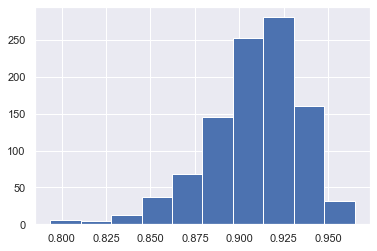

95.0 confidence interval 84.7% and 95.0%


In [957]:
# plot scores
pyplot.hist(stats)
pyplot.show()

# confidence interval
alpha = 0.95   # for 95% confidence
p = ((1.0-alpha)/2.0)*100  # tail regions on right and left 0.25 on each side indicated by p value (border)
lower = max(0.0, np.percentile(stats,p))
p = (alpha + ((1.0-alpha)/2.0))*100
upper = min(1.0, np.percentile(stats,p))
print('%0.1f confidence interval %.1f%% and %.1f%%' %(alpha*100, lower*100, upper*100))


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 9. Conclusion
<a id='C'></a>

<font color = tiel>

### Basis of selection of algorithms which are suitbale for this project......

In [958]:
result_itteration1

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    69.965042                0.506141        59.191047   
1              Ridge    69.958537                0.506196        59.192380   
2              Lasso    37.632265                0.729353        33.833772   
3       Deision Tree    58.310412                0.659683        60.047945   
4     Support Vector    82.944132                0.421947        83.897852   
5      Random Forest    90.357089                0.317267        91.578826   
6            XGBoost    92.195915                0.285419        93.556535   
7      GradientBoost    86.618808                0.373739        87.411868   

    Std_Dev  
0  7.307688  
1  7.300019  
2  5.797047  
3  6.644179  
4  2.909932  
5  2.396392  
6  2.498270  
7  2.211392

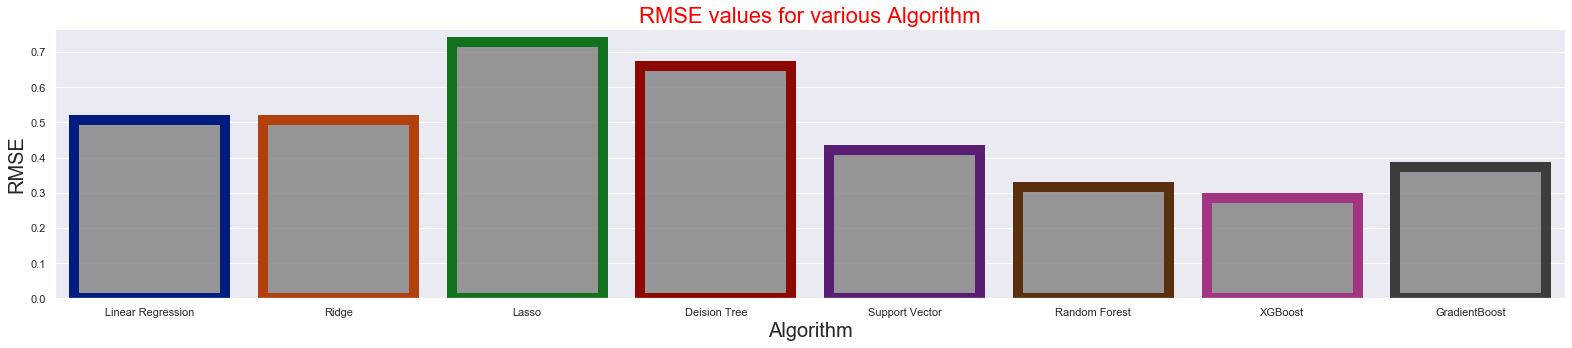

In [959]:
fig = plt.figure(figsize = (22,5))



plt.title ('RMSE values for various Algorithm',y=1, size = 22, color = 'red')

sns.barplot(y = result_itteration1['Root Mean Square Error'], x = result_itteration1['Algorithm'], facecolor = (0.5,0.5,0.5,0.8), linewidth = 10, edgecolor = sns.color_palette ('dark', 12) );

plt.ylabel('RMSE', size = 20)
plt.xlabel('Algorithm', size = 20)
plt.tight_layout()

In [960]:
result_itteration2

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    60.347237                0.670540        55.562938   
1              Ridge    60.336035                0.670653        55.563602   
2              Lasso    30.019455                0.948238        29.427266   
3       Deision Tree    52.918005                0.688565        51.525774   
4     Support Vector    75.984861                0.518199        74.430066   
5      Random Forest    82.793223                0.414309        83.873459   
6            XGBoost    81.663114                0.411717        83.776223   
7      GradientBoost    79.034399                0.466321        79.741688   

    Std_Dev  
0  6.458897  
1  6.456769  
2  7.810435  
3  8.090367  
4  5.612207  
5  3.415621  
6  3.757386  
7  3.312904

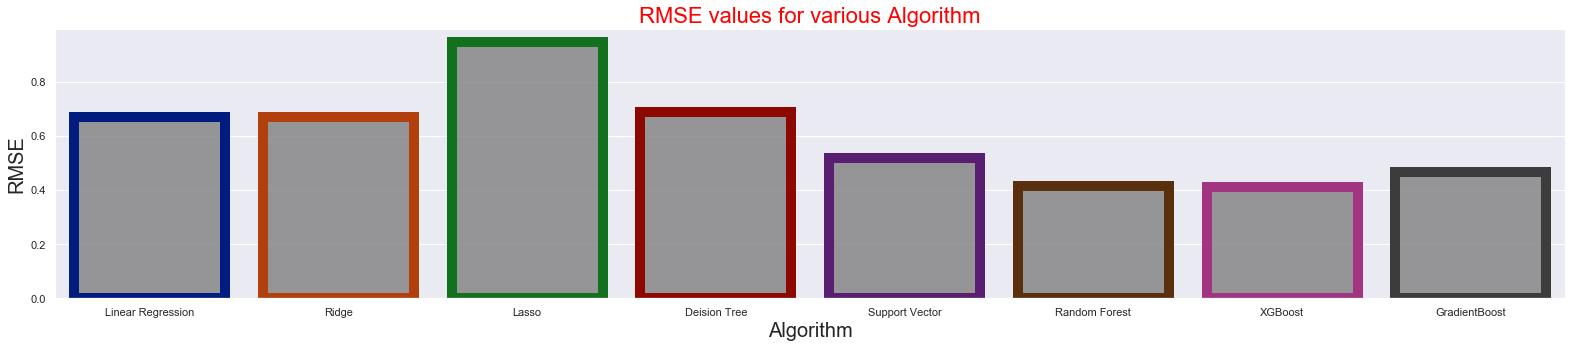

In [961]:
fig = plt.figure(figsize = (22,5))



plt.title ('RMSE values for various Algorithm',y=1, size = 22, color = 'red')

sns.barplot(y = result_itteration2['Root Mean Square Error'], x = result_itteration2['Algorithm'], facecolor = (0.5,0.5,0.5,0.8), linewidth = 10, edgecolor = sns.color_palette ('dark', 12) );

plt.ylabel('RMSE', size = 20)
plt.xlabel('Algorithm', size = 20)
plt.tight_layout()

In [962]:
result_itteration3

Algorithm  Model_score  Root Mean Square Error  Cross_val_score  \
0  Linear Regression    56.613860                0.698418        52.267753   
1              Ridge    56.608356                0.698479        52.269813   
2              Lasso    25.878016                0.944048        24.473386   
3       Deision Tree    54.498610                0.704209        56.634475   
4     Support Vector    72.140254                0.553305        73.290340   
5      Random Forest    83.620314                0.465409        84.352936   
6            XGBoost    82.231836                0.470004        83.526744   
7      GradientBoost    79.507972                0.495998        79.433124   

    Std_Dev  
0  7.481897  
1  7.478485  
2  7.239213  
3  4.983943  
4  7.813029  
5  3.886086  
6  4.072049  
7  3.367108

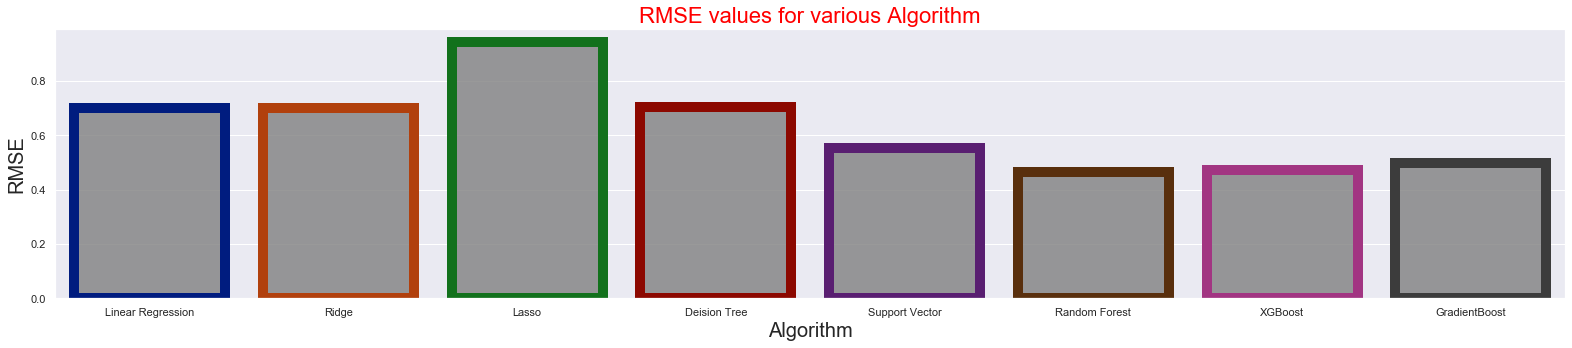

In [963]:
fig = plt.figure(figsize = (22,5))



plt.title ('RMSE values for various Algorithm',y=1, size = 22, color = 'red')

sns.barplot(y = result_itteration3['Root Mean Square Error'], x = result_itteration3['Algorithm'], facecolor = (0.5,0.5,0.5,0.8), linewidth = 10, edgecolor = sns.color_palette ('dark', 12) );

plt.ylabel('RMSE', size = 20)
plt.xlabel('Algorithm', size = 20)
plt.tight_layout()

### Observations:

<Span style="font-family: Times New Roman;font-size:1.2em;color:blue;">
    
    
- From the above iteration, we have taken the models which have least RMSE value and highest model score.
    
- For linear repression, cost function is the RMSE, which is to be minimized.
    
- So the models like Random Forest and XGBoost Repressor are the best models which have least RMSE value and maximum model score.
    
- Based upon this criteria, we can take these two models for further tuning and to squeeze the extra performance out of the model without making those under fit or Over fit.  


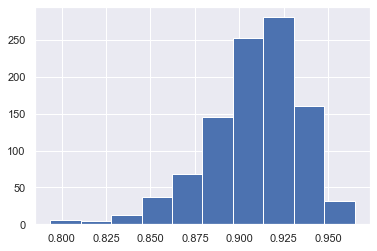

95.0 confidence interval 84.7% and 95.0%


In [964]:
# plot scores
pyplot.hist(stats)
pyplot.show()

# confidence interval
alpha = 0.95   # for 95% confidence
p = ((1.0-alpha)/2.0)*100  # tail regions on right and left 0.25 on each side indicated by p value (border)
lower = max(0.0, np.percentile(stats,p))
p = (alpha + ((1.0-alpha)/2.0))*100
upper = min(1.0, np.percentile(stats,p))
print('%0.1f confidence interval %.1f%% and %.1f%%' %(alpha*100, lower*100, upper*100))


### Model Performance range at 95% confidence level


<Span style="font-family: Times New Roman;font-size:1.2em;color:darkgreen;">
    
    
> Since the model XGBoost Regressor has provided the best result by minimizing the cost function and maximizing the model score, we will go with it as a suitable model.

> And after tuning the model by employing techniques to squeeze the extra performance out of the model without making it overfit or underfit we achieved a model score of 86.05% with a standard deviation of 6.85 at 95 % of confidence level. So the range estimate of my model score is in between 79.2% and 92.9%.

>> This range estimate is at 95% confidence level. That means with 95% confidence level we can say our model score will range between 79.2% and 92.9% in production.

>> Almost the same amount of model score (85.68%) we are also getting out of XGBoost regressor algorithm with a standard deviation of 3.371% while using Randomized Search CV Hyper Parameter model tuning technique.


### Summary:

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">
    
- In this data set, we have tried to predict the strength of the Concrete based on the proportional quantity of some ingredients and age or incubation time period required to induce the compressive strength in concrete.
    
    
- The data set has very less challenging as far as data cleaning is concerned. It was almost a cleaned dataset except the presence of some duplicate data points.
    
    
- From EDA part, we tried to draw the relation between target feature and independent features.
    
    
- We have also checked the range, IQR, Skewness and presence of outliers.
    
    
- Outliers were being addressed by using median value of each attributes, which in turn generated some more outliers due to sharpening of the distribution and decrease in Standard Deviation.
    
    
- We have tried to build clusters by using K-means clustering algorithm from unsupervised machine learning technique.
    
    
- Feature importance were also been checked for all the features by using VIF value and Decision Tree, Random Forest, XGBoost & Gradient Boost regression techniques.
    
    
- Two Composite features were also been created to predict the target column.
    
        
- For this data set we made total 8 different models to predict the target columns such as Non-residual linear Model, Residual Linear models like Ridge & Lasso, Decision Tree Regression Model, Random Forest Regressor model, Support Vector Regressor model, XGBoost Regressor Model, Gradient Boost Regressor Model. 
    
    
- Based upon the residual plots, Ridge and Lasso methods, complexity of the model has also been checked. The Lasso model acted like a Dimensionality reduction technique to reduce the dimension of the data set and predict the target column. Based on the inference drawn, simple linear models were created to predict the target column.
    
    
- Polynomial features were also been created to check the prediction capability of None regularised and regularised models.
    
    
- K-fold Cross Validation technique has also been implemented to predict the target column.
    
    
- At least based upon the Cost function which is Root Mean Square Error (RMSE) for regression technique and model score, we selected two models for tuning by further employing feature engineering techniques such as Grid Search CV and Random Search CV without making those overfit and underfit.
    
    
- And out of these iteration we elected XGBoost model over Random Forest Regressor to go with and thus, we calculated the Model performance range at 95% confidence level.
    
    
- From the above iteration, we have taken the models which have least RMSE value and highest model score.
    
    
- For linear repression, cost function is the RMSE, which is to be minimized.
    
    
- So the models like Random Forest and XGBoost Repressor are the best models which have least RMSE value and maximum model score.
    
    
- Based upon this criteria, we can take these two models for further tuning and to squeeze the extra performance out of the model without making those under fit or Over fit.  


## <span style="font-family: Algerian; font-weight:bold;font-size:1 em;color:Red; center">      THE END